In [1]:
CODE_REPO_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/analysis/'

import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import sys
import os

import pandas as pd
import scipy as sc
import numpy as np

sys.path.insert(0, CODE_REPO_PATH)
import read_data as rd
import behaviour as bh
import pfl3_ephys as pe

%config InlineBackend.figure_format = 'retina'

In [2]:
DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/data/'
FIGURE_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/Figures/pdf_and_png/'
SOURCE_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/source_data/'
MODEL_FIT_CSV_PATH = '/YOUR_PATH/Converting_allo_goal_to_ego_steering/model_and_fit_csv/'

save_figure=False
save_source_data=False

### Load recordings

In [5]:
reload(pe)
recs=pe.load_data(DATA_PATH,reprocess=False)

In [6]:
duration = recs.merged_abf_df.groupby(['rec_name']).apply(lambda x: x['t'].max() - x['t'].min())
print('Mean duration of all recordings',np.mean(duration)/60.)
print('Max duration of all recordings',np.max(duration)/60.)
print('Min duration of all recordings',np.min(duration)/60.)

Mean duration of all recordings 45.91871436334426
Max duration of all recordings 120.0731689453125
Min duration of all recordings 6.332973225911458


### Get virtual heading (i.e., inverse of bar position) and correct liquid-junction potential


In [7]:
pe.get_vh(recs)
pe.correct_ljp(recs)

### All full recording tuning curves Fig. 3c-d, ED Fig. 6d-e

In [8]:
reload(pe)

pd_df=pe.get_pd_df(recs,)
PFL3_row_order=pd_df.query('celltype=="PFL3"').sort_values(by=['pd'])['rec_name'].unique()

# cell number used in paper (based on sorted pd),
# as opposed to cell number based on recording order 
rec_name_to_cell_no = dict(zip(PFL3_row_order,np.arange(len(PFL3_row_order))+1))

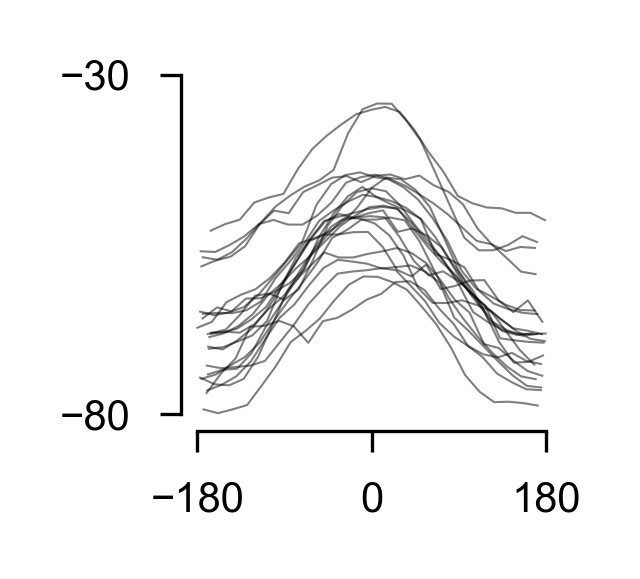

In [9]:
reload(pe)
pe.plot_all_vm_aligned(pd_df,rec_name_to_cell_no,
                       save_figure=save_figure,
                       save_figure_path=FIGURE_PATH,
                       figure_fname='Fig_3d.pdf',
                       save_source_data=save_source_data,
                       save_source_data_path=SOURCE_DATA_PATH,
                       source_data_fname='Fig_3d.csv'
                      )

*Vm* tuning curves

In [10]:
reload(pe)
fits_df=pe.get_fits_df(pd_df,MODEL_FIT_CSV_PATH)

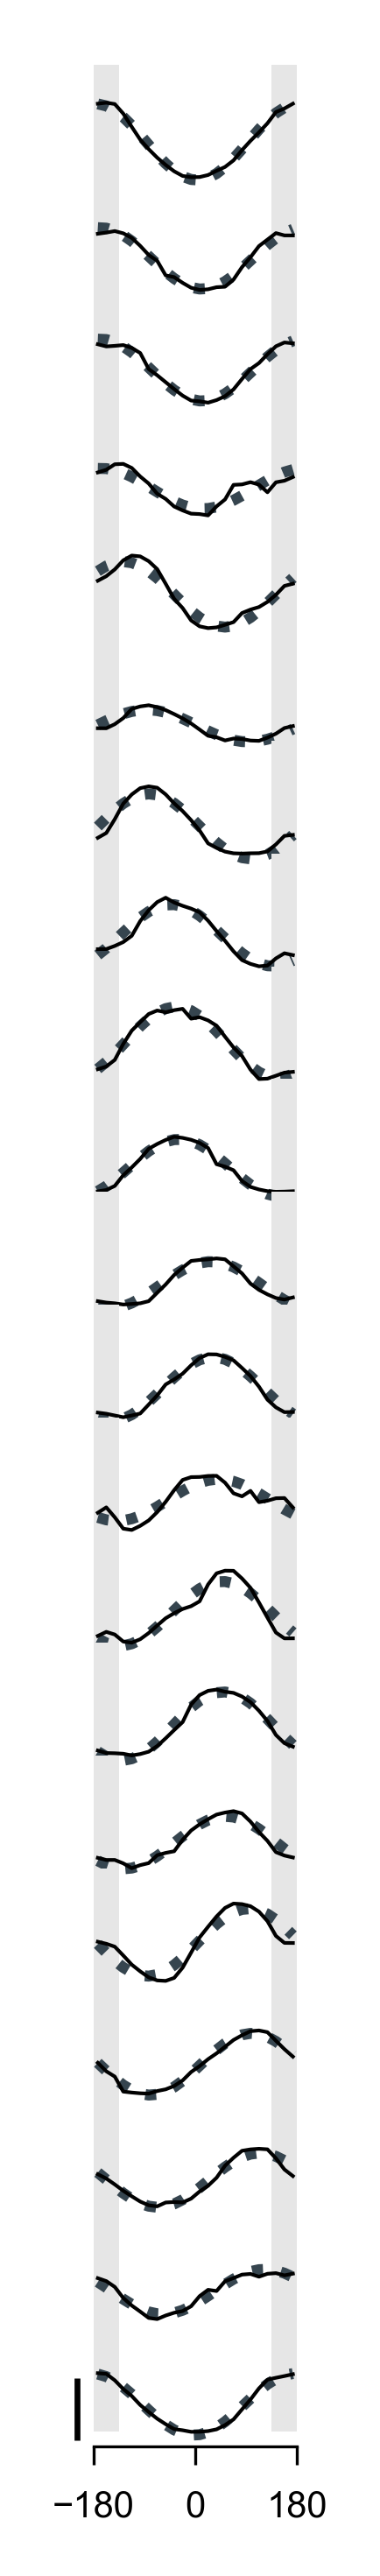

In [11]:
reload(pe)
pe.plot_all_vm(pd_df,fits_df,rec_name_to_cell_no,PFL3_row_order,
               save_figure=save_figure,
                    save_figure_path=FIGURE_PATH,
                    figure_fname='ED_Fig_6d.pdf',
                    save_source_data=save_source_data,
                    save_source_data_path=SOURCE_DATA_PATH,
                    source_data_fname='ED_Fig_6d.csv')

Spike rate tuning curves

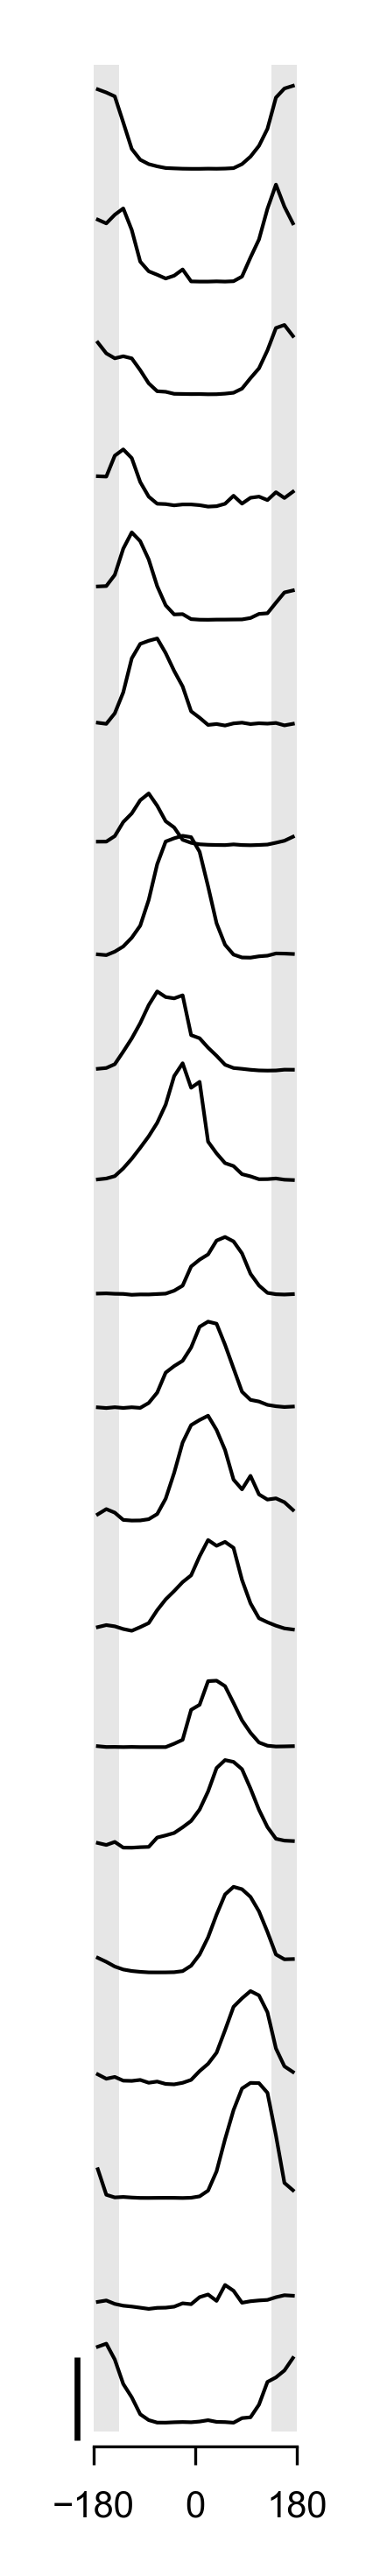

In [12]:
reload(pe)
pe.plot_all_sp_rate(pd_df,rec_name_to_cell_no,PFL3_row_order,
                    save_figure=save_figure,
                    save_figure_path=FIGURE_PATH,
                    figure_fname='ED_Fig_6e.pdf',
                    save_source_data=save_source_data,
                    save_source_data_path=SOURCE_DATA_PATH,
                    source_data_fname='ED_Fig_6e.csv')

Example tuning curves *Vm* tuning curves

[8, 21, 17]


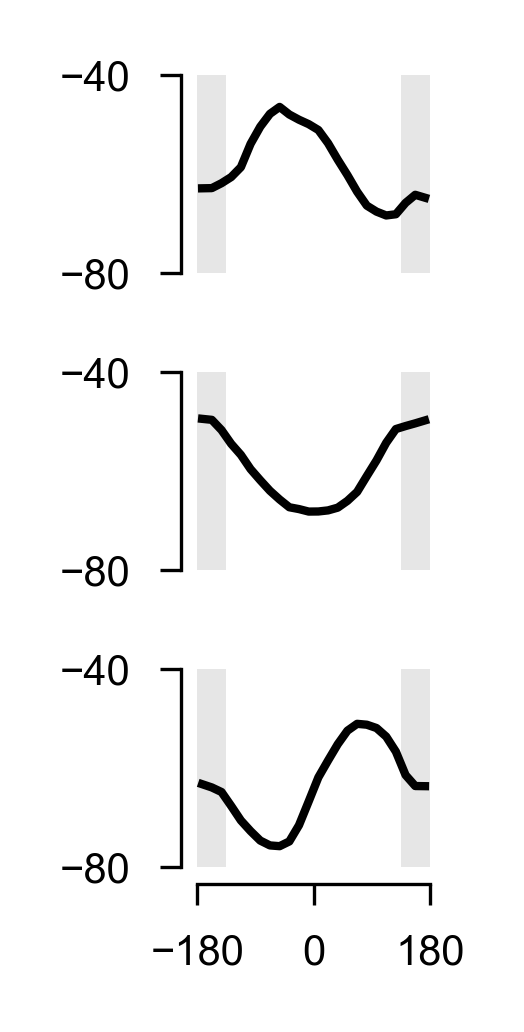

In [13]:
reload(pe)
pe.plot_example_tuning_curves_vm(['2021_09_24_0002',
                                  '2021_11_01_0006',
                                  '2021_09_06_0001'],pd_df,rec_name_to_cell_no,
                                 save=save_figure,
                                 savepath=FIGURE_PATH,
                                 fname='Fig_3c_left.pdf')

Example spike rate tuning curves 

[8, 21, 17]


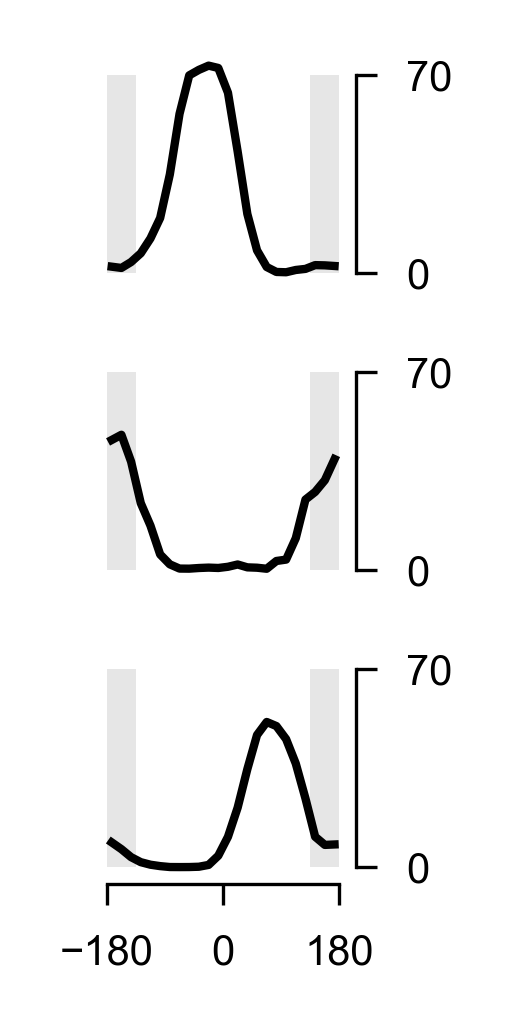

In [14]:
reload(pe)
pe.plot_example_tuning_curves_sp_rate(['2021_09_24_0002',
                                  '2021_11_01_0006',
                                  '2021_09_06_0001'],pd_df,rec_name_to_cell_no,
                                      save=save_figure,
                                      savepath=FIGURE_PATH,
                                     fname='Fig_3c_right.pdf')

### Example traces (Fig. 3b)

8


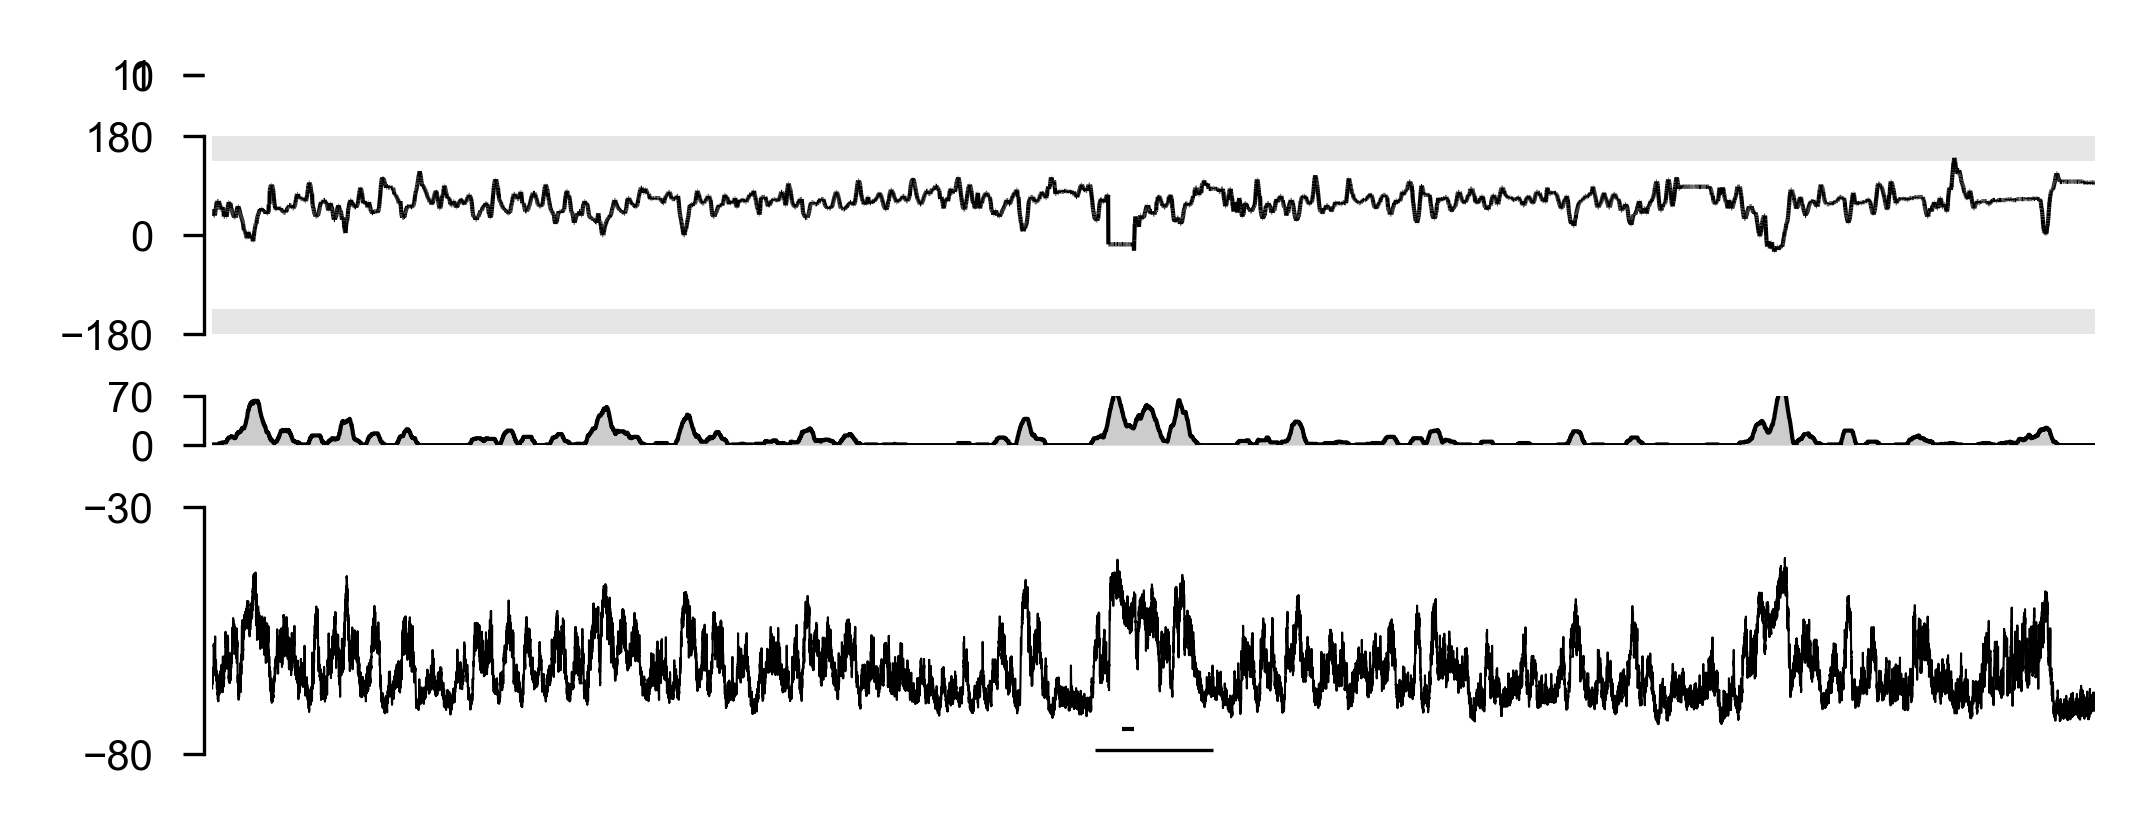

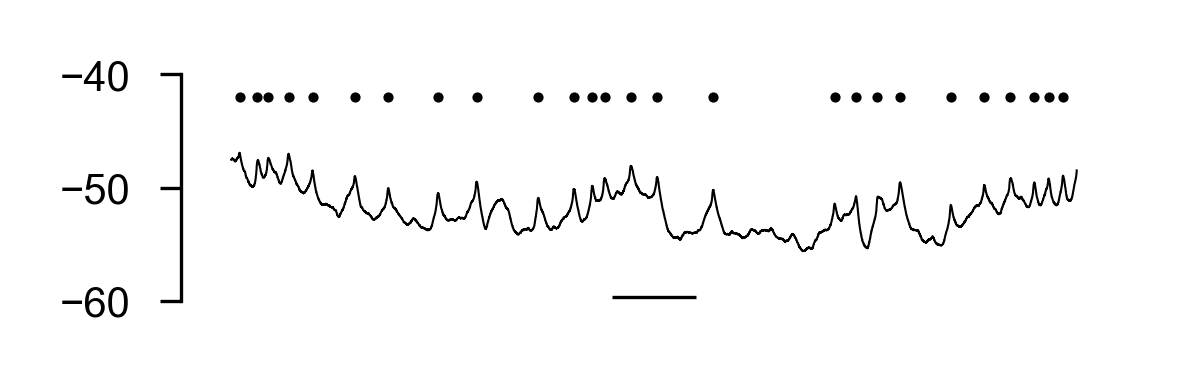

In [15]:
reload(pe)
import analysis_plot as ap
reload(ap)
pe.plot_example_trace(recs,rec_name_to_cell_no,pd_df,save=save_figure,savepath=FIGURE_PATH,fname='Fig_3b')

### Discriminating PFL3 vs PEG (ED Fig. 6b-c)

2


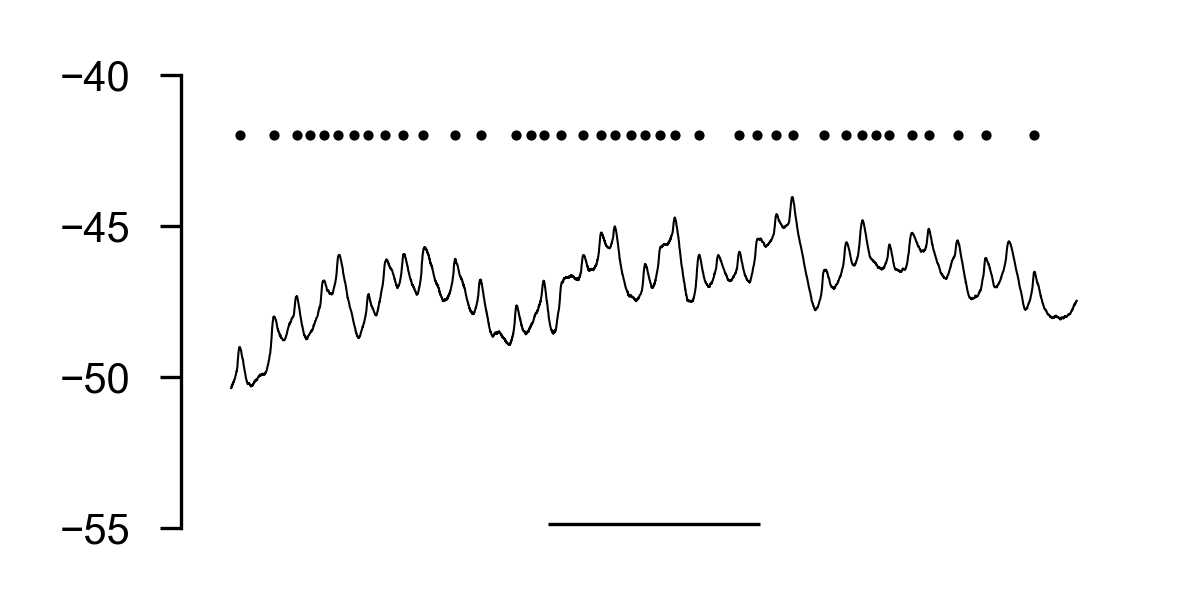

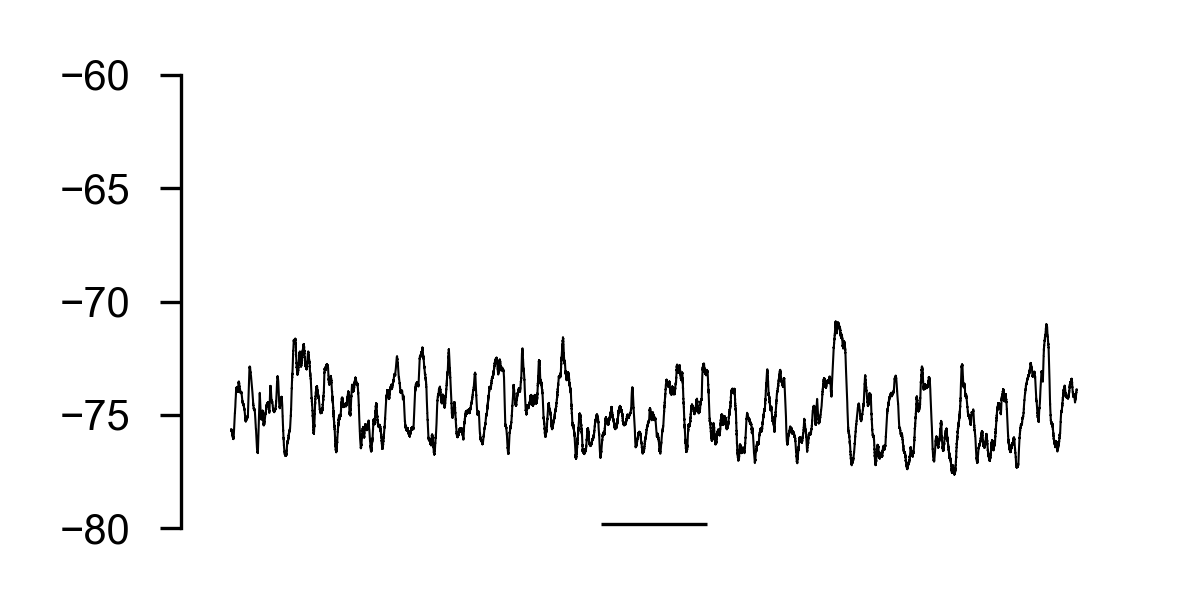

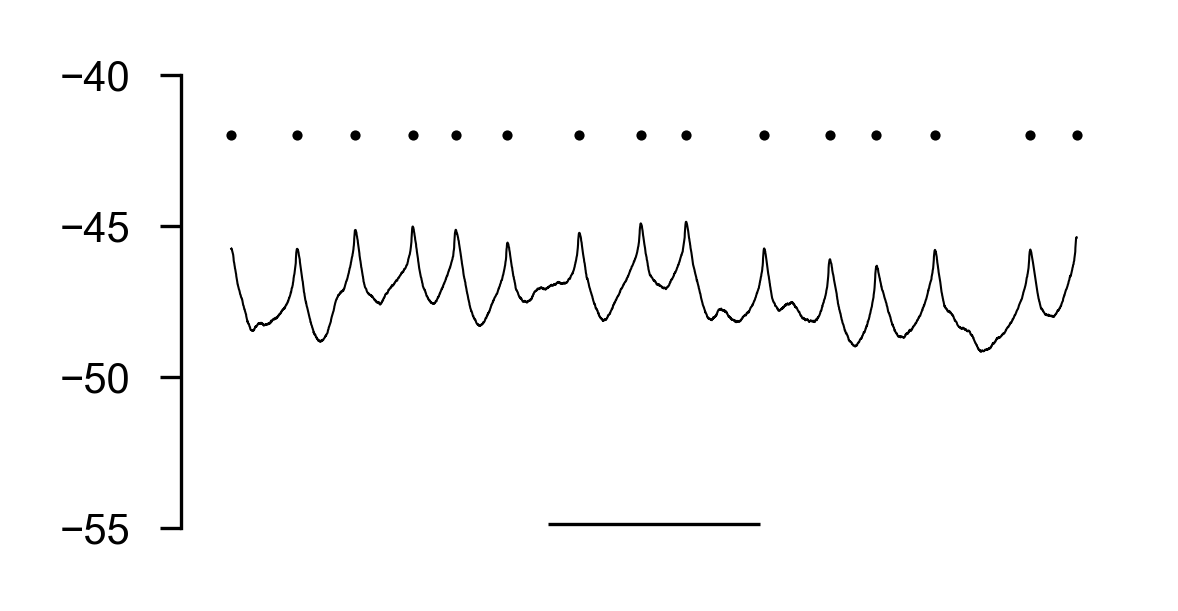

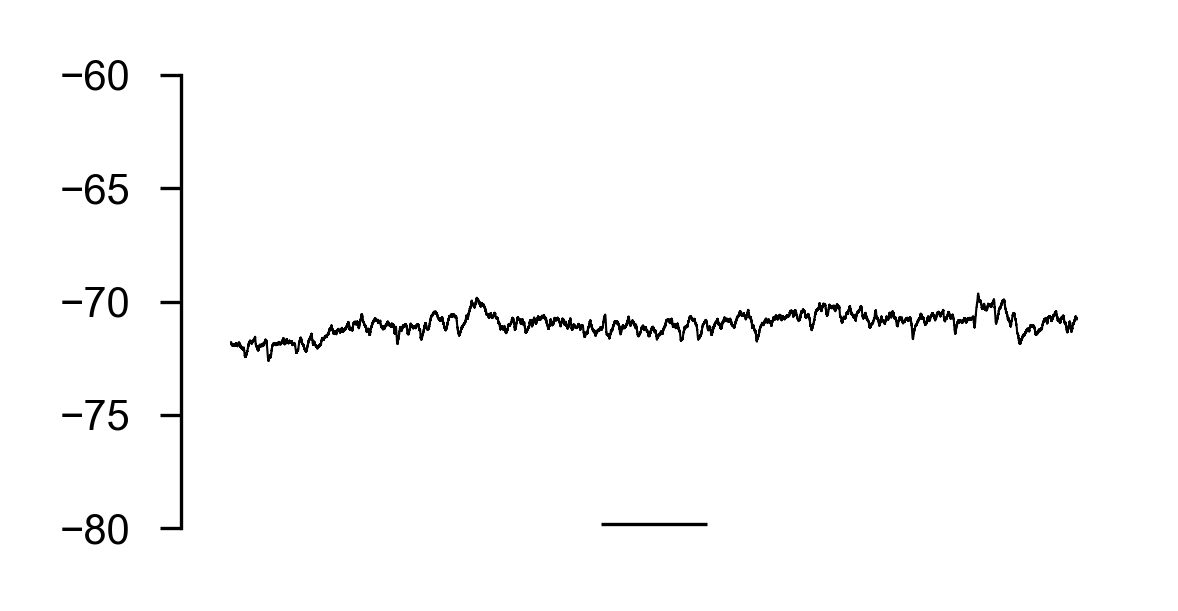

In [16]:
reload(pe)
pe.plot_pfl3_vs_peg(recs,rec_name_to_cell_no,
                    save=save_figure,
                    savepath=FIGURE_PATH,
                    fnames=['ED_Fig_6b','ED_Fig_6c'])

### Get menotaxis bouts (called fixation events here)


In [17]:
reload(pe)
abf_fixation_df=pe.get_fixation_events(recs)

### Example tuning curve goal modulation (Fig. 3e)

12


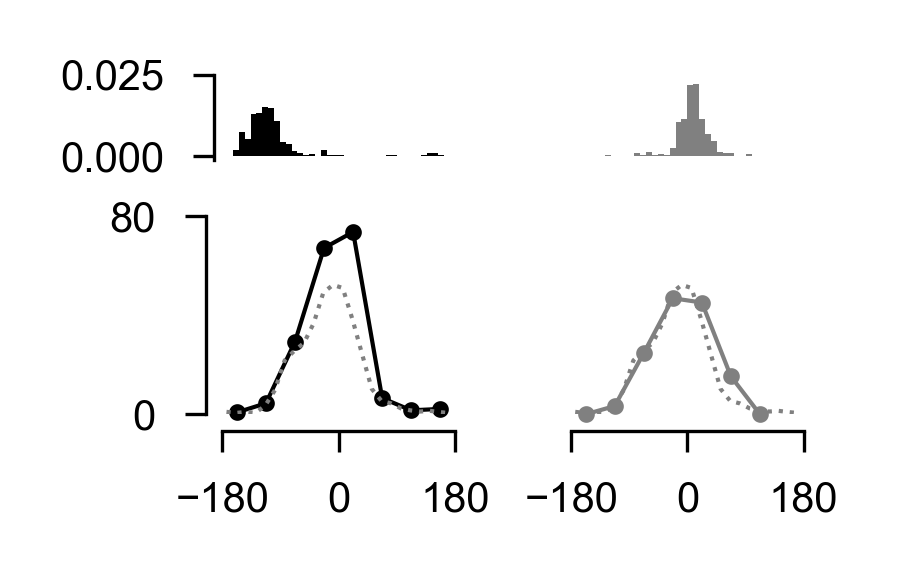

1


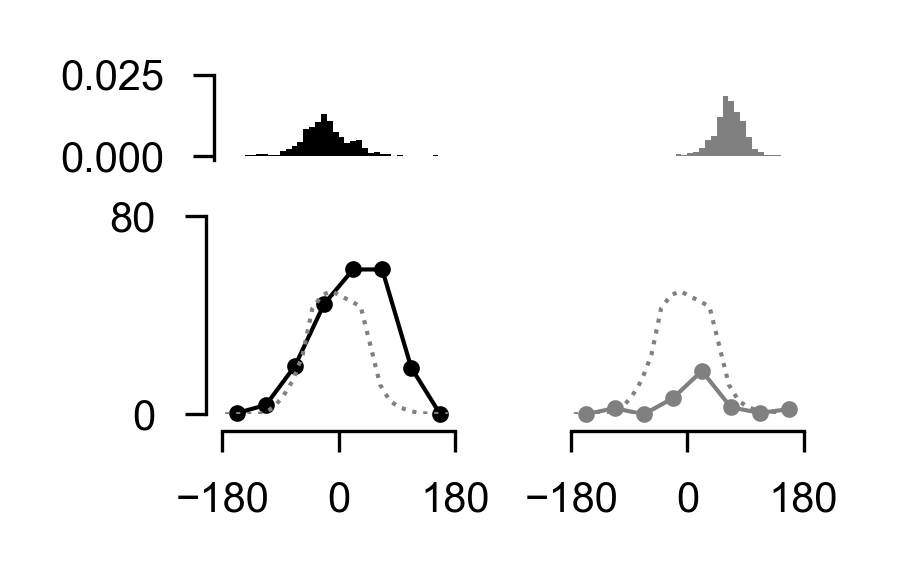

17


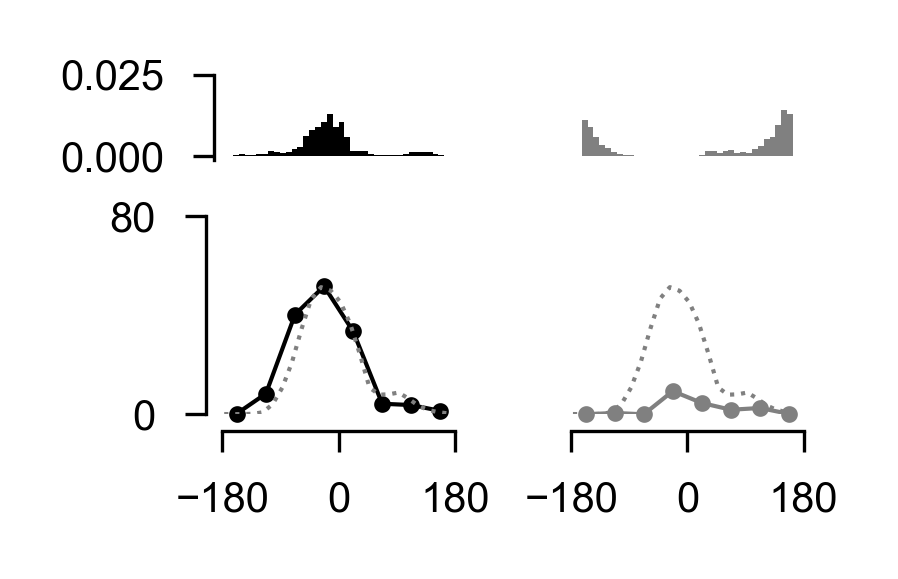

In [18]:
reload(pe)
pe.plot_example_tuning_curve_modulation(abf_fixation_df,rec_name_to_cell_no,
                                         pd_df,save=save_figure,savepath=FIGURE_PATH,fname='Fig_3e')

### Goal modulation plots

In [19]:
reload(pe)
event_df,fly_modulation_df,modulation_df=pe.get_modulation_df(abf_fixation_df)

In [20]:
# #counts min/max timepoints for each bin

# count_df=ap.get_binned_df(abf_fixation_df,
#                            bin_values = {'vh_pd_subtracted':np.linspace(-180,180,9),
#                                          'goal_to_pd_distance':np.linspace(-180,180,9)},
#                            labels = ['sp_rate','vm_sp_subtracted','vm','vm_sp_subtracted_zeroed'],
#                            id_vars = ['LAL_side','celltype','rec_name'],
#                            query ='is_fixating==True & `dforw_boxcar_average_0.5_s`>1',metric=len,
#                            )



In [21]:
# # 40 ms
# print(count_df['mean_value'].min()* (1/50.))

In [22]:
# # 14 min
# print(count_df['mean_value'].max()* (1/50.) /60.)

### Fig. 3f
Left PFL3 neurons, spike rate

15 cells


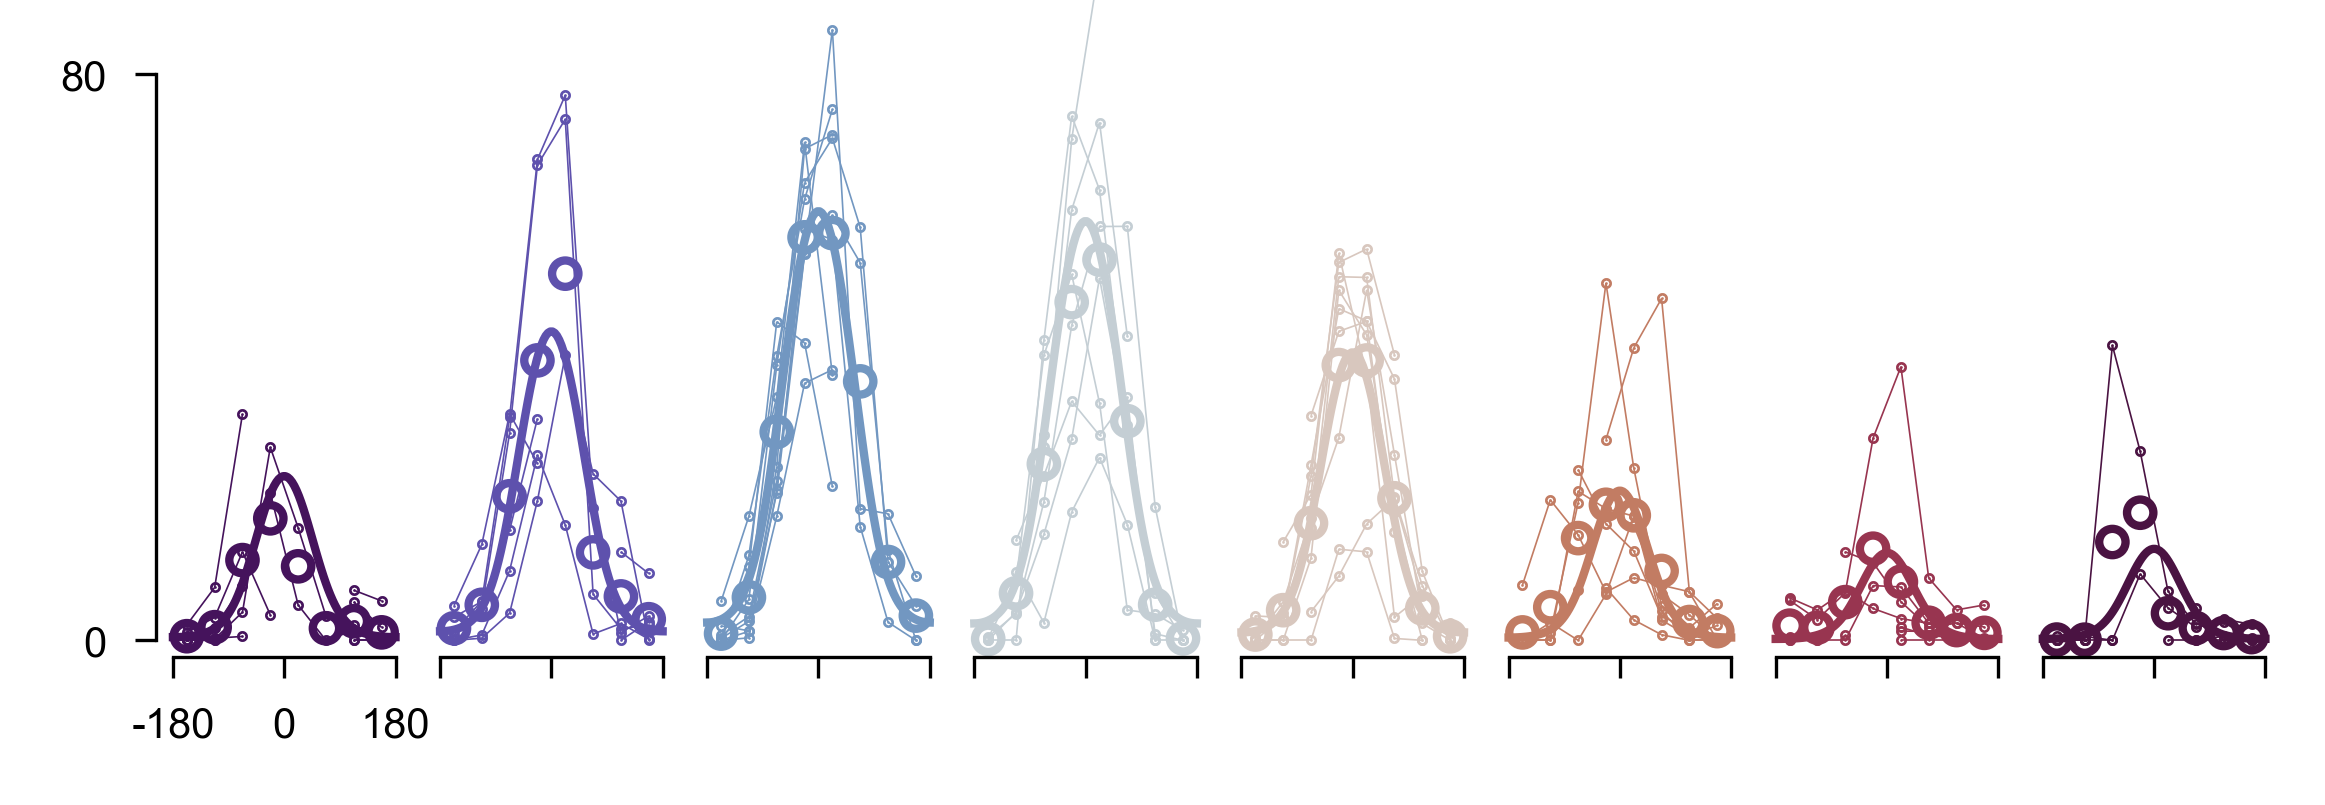

In [23]:
reload(pe)
pe.plot_left_sp_rate_modulation(modulation_df,rec_name_to_cell_no,
                    save_figure=save_figure,
                    save_figure_path=FIGURE_PATH,
                    figure_fname='Fig_3f.pdf',
                    save_source_data=save_source_data,
                    save_source_data_path=SOURCE_DATA_PATH,
                    source_data_fname='Fig_3f.csv')

15 left cells
6 right cells


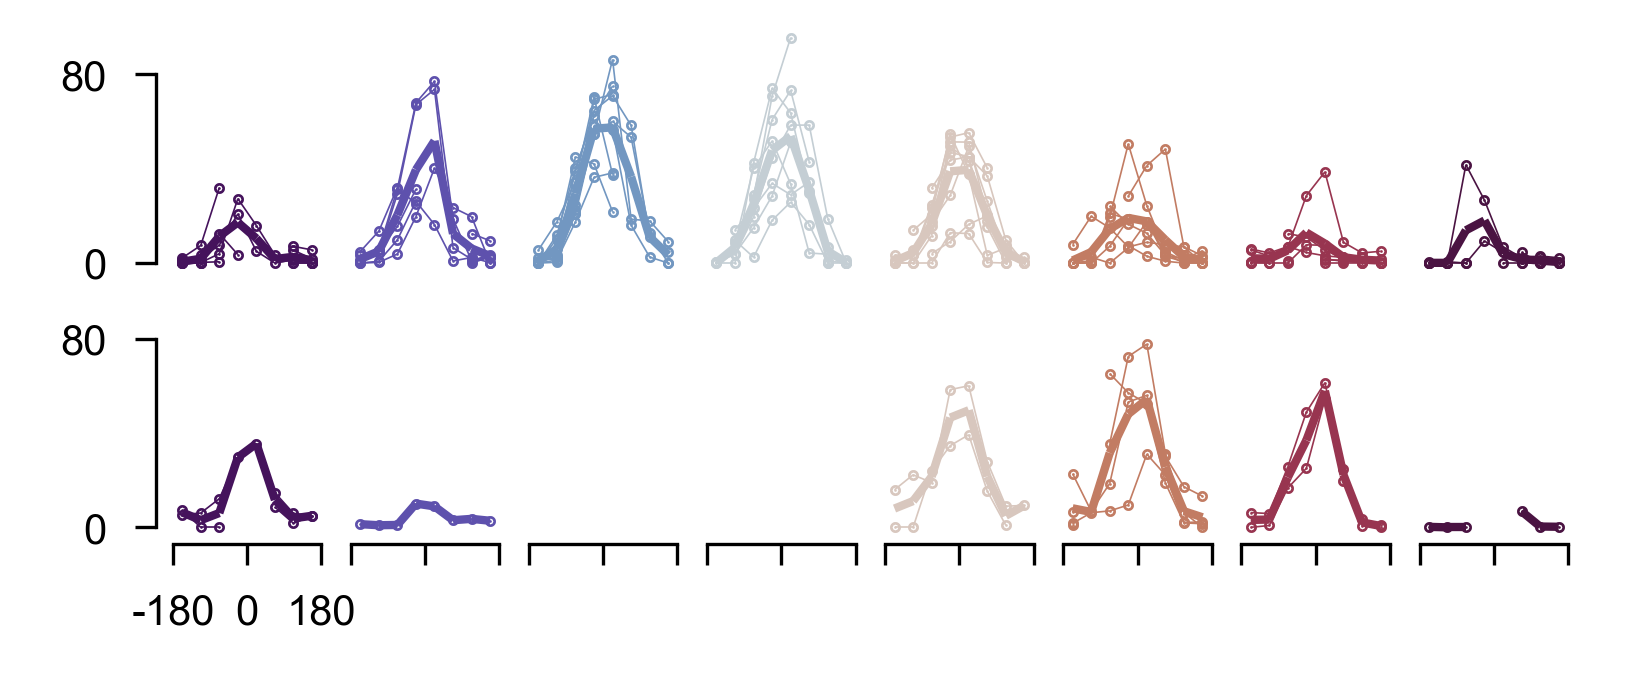

In [24]:
reload(pe)
pe.plot_left_right_sp_rate_modulation(modulation_df,rec_name_to_cell_no,
                    save_figure=save_figure,
                    save_figure_path=FIGURE_PATH,
                    figure_fname='ED_Fig_7b.pdf',
                    save_source_data=save_source_data,
                    save_source_data_path=SOURCE_DATA_PATH,
                    source_data_fname='ED_Fig_7b.csv')

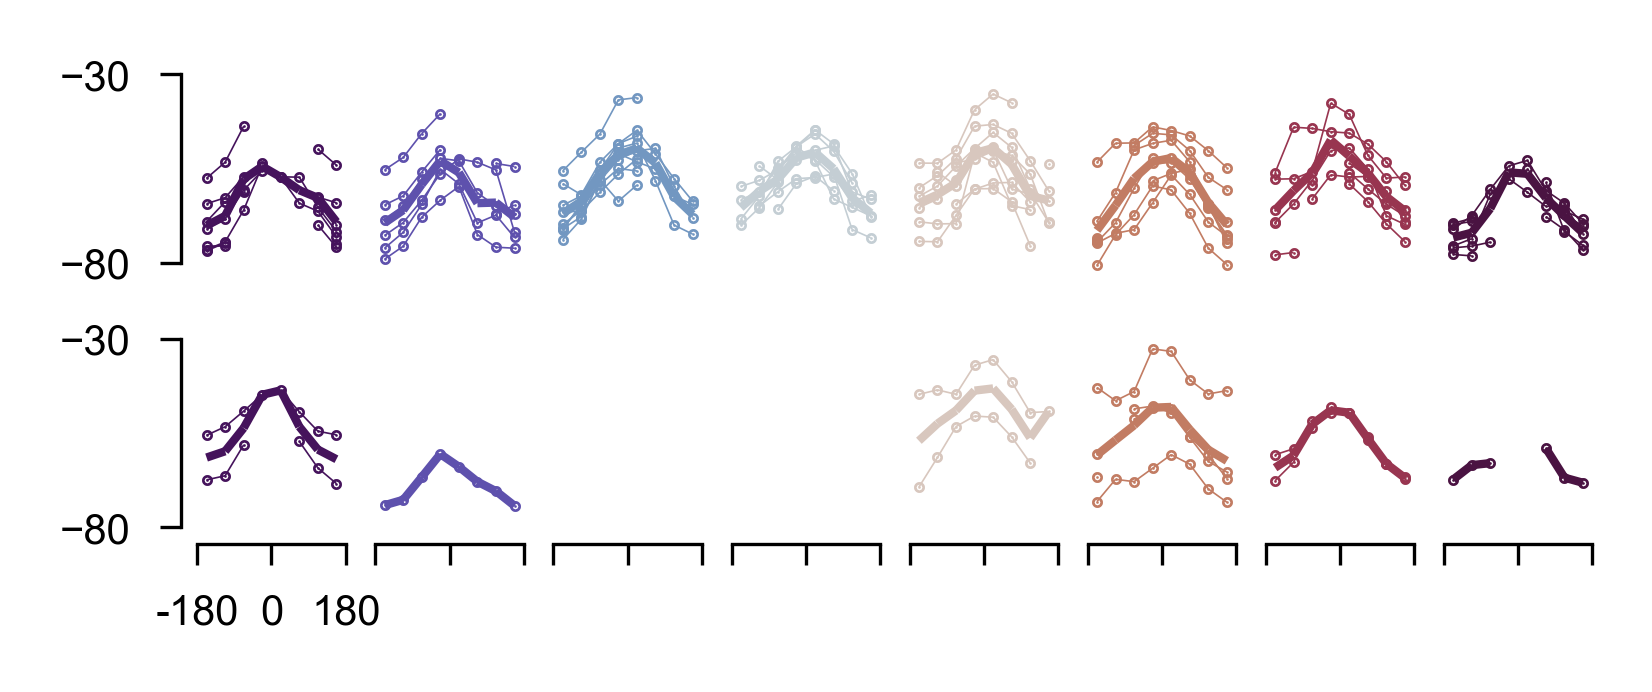

In [25]:
reload(pe)
pe.plot_left_right_vm_modulation(modulation_df,rec_name_to_cell_no,
                    save_figure=save_figure,
                    save_figure_path=FIGURE_PATH,
                    figure_fname='ED_Fig_7d.pdf',
                    save_source_data=save_source_data,
                    save_source_data_path=SOURCE_DATA_PATH,
                    source_data_fname='ED_Fig_7d.csv')

In [26]:
reload(pe)
event_df_sem=pe.get_event_df_sem(abf_fixation_df,event_df)

[1, 2, 3, 5, 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 4, 6, 8, 11, 16, 21]


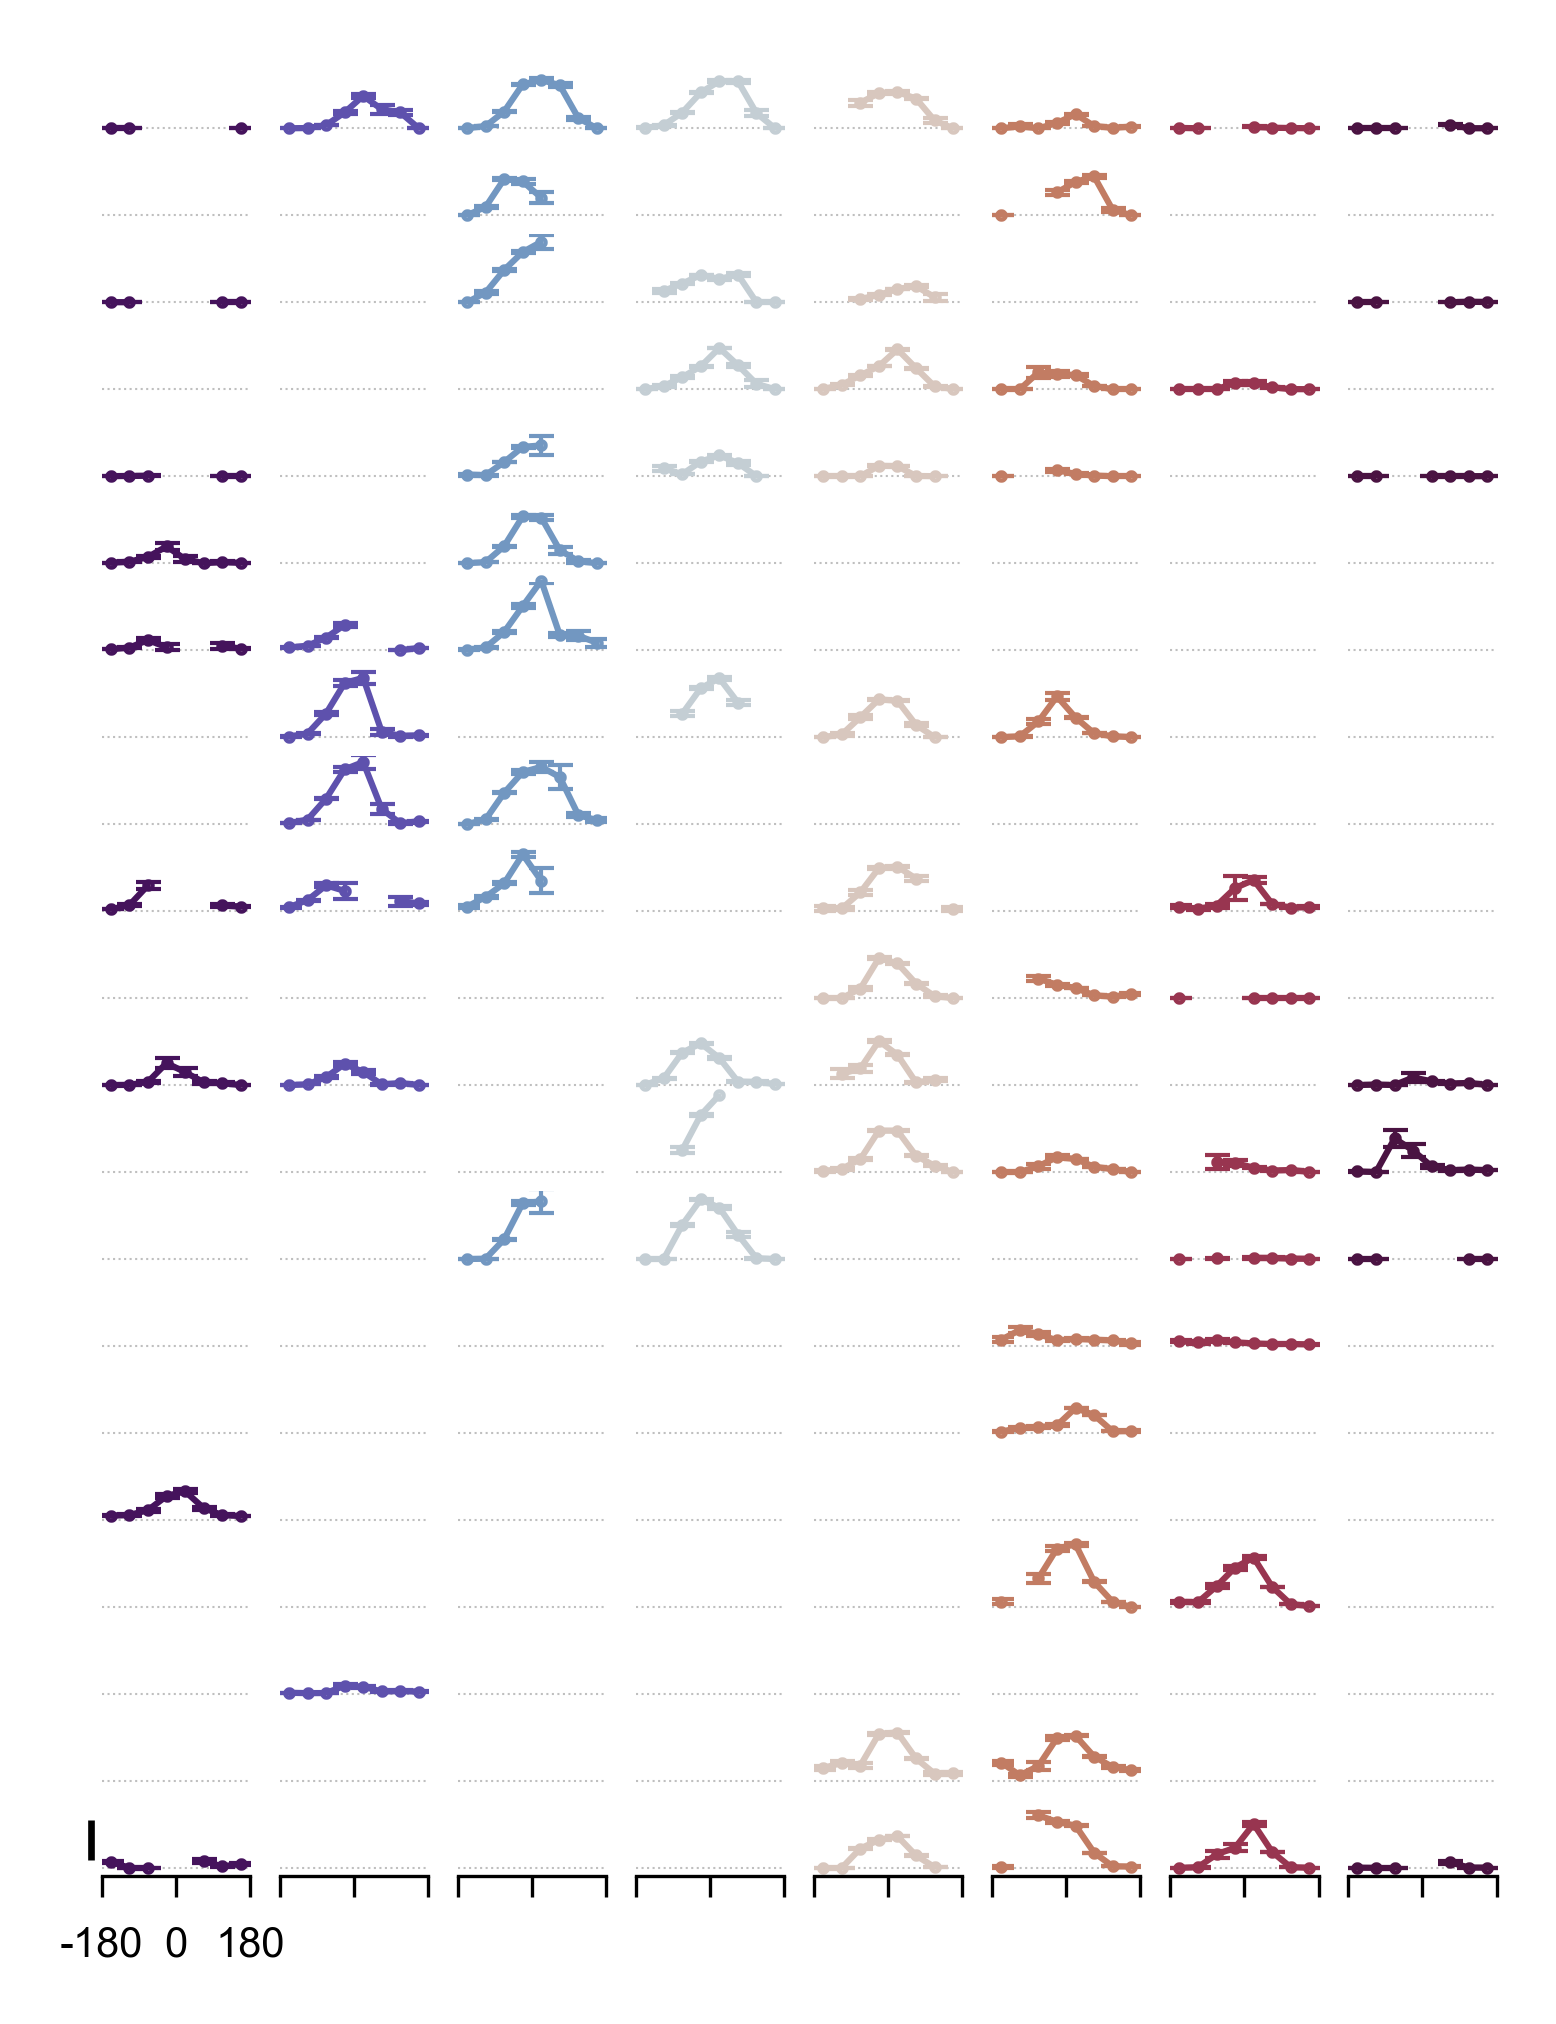

In [27]:
reload(pe)
pe.plot_all_cells_sp_rate_modulation(event_df_sem,rec_name_to_cell_no,
                                     save=save_figure,
                                     savepath=FIGURE_PATH,
                                     fname='ED_Fig_7a.pdf')

[1, 2, 3, 5, 7, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20, 4, 6, 8, 11, 16, 21]


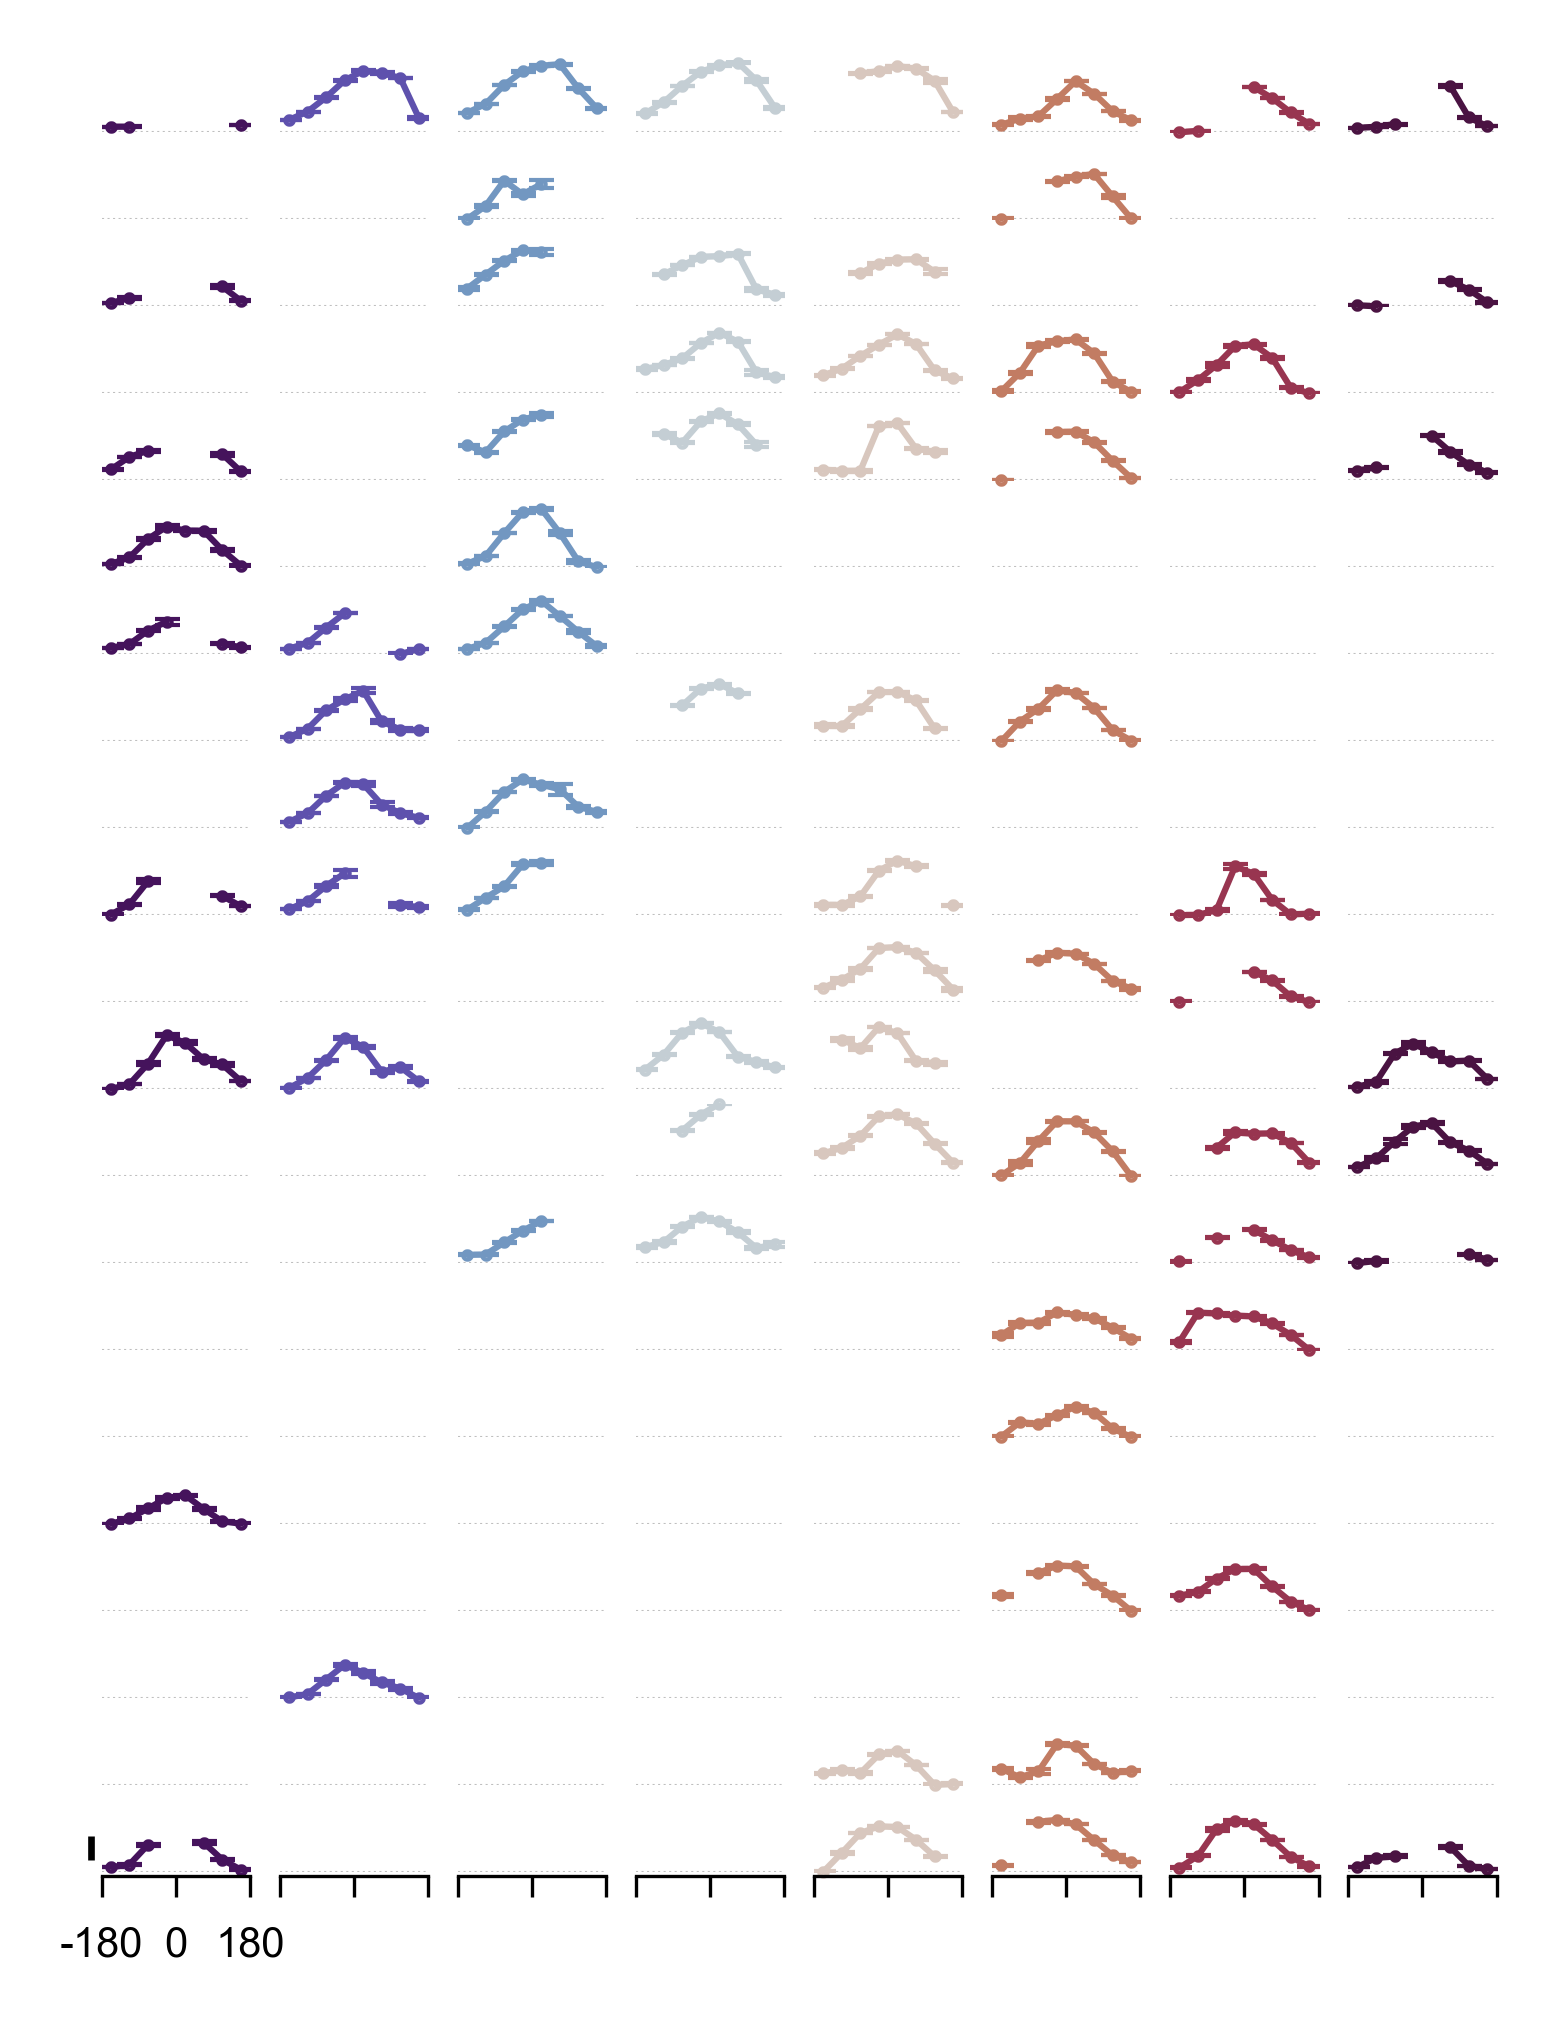

In [28]:
reload(pe)
pe.plot_all_cells_vm_modulation(event_df_sem,rec_name_to_cell_no,
                                save=save_figure,
                                savepath=FIGURE_PATH,
                               fname='ED_Fig_7c.pdf')

### Spike rate vs. *Vm* (ED Fig. 9b)

In [29]:
reload(pe)

mean_spike_vs_vm_df=pe.get_spike_vs_vm_df(abf_fixation_df,
                                          save=save_source_data,
                                          savepath=SOURCE_DATA_PATH,
                                          fname='ED_Fig_9b.csv'
                                         )

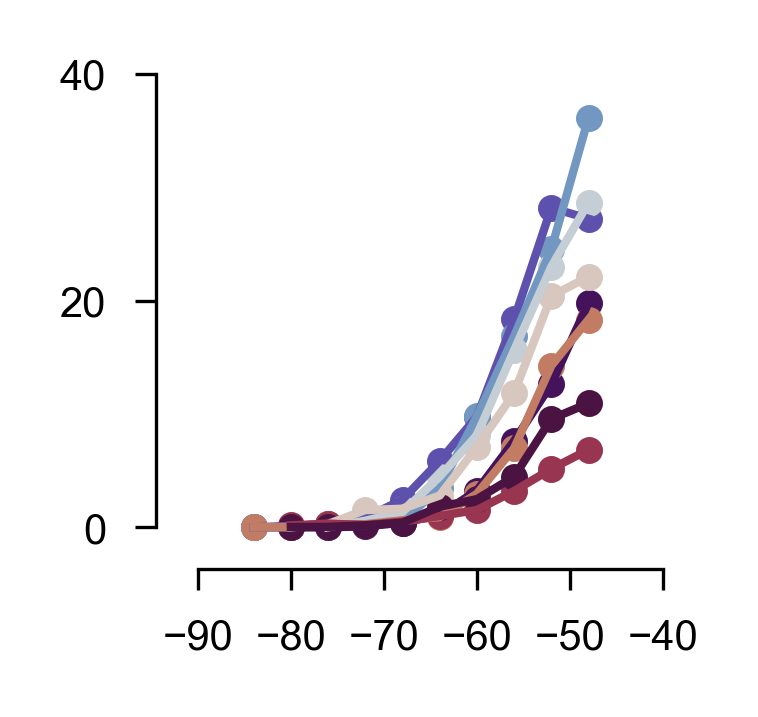

In [30]:
reload(pe)
pe.plot_sp_vs_vm(mean_spike_vs_vm_df,
                 save=save_figure,
                 savepath=FIGURE_PATH,
                fname='ED_Fig_9b.pdf')

*Vm* shifts vs goal, spike rate vs shifted *Vm* 

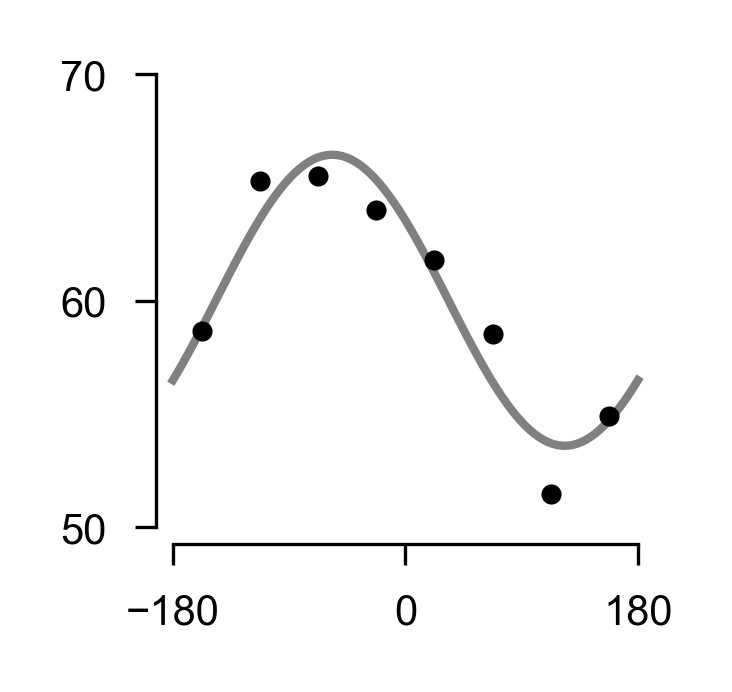

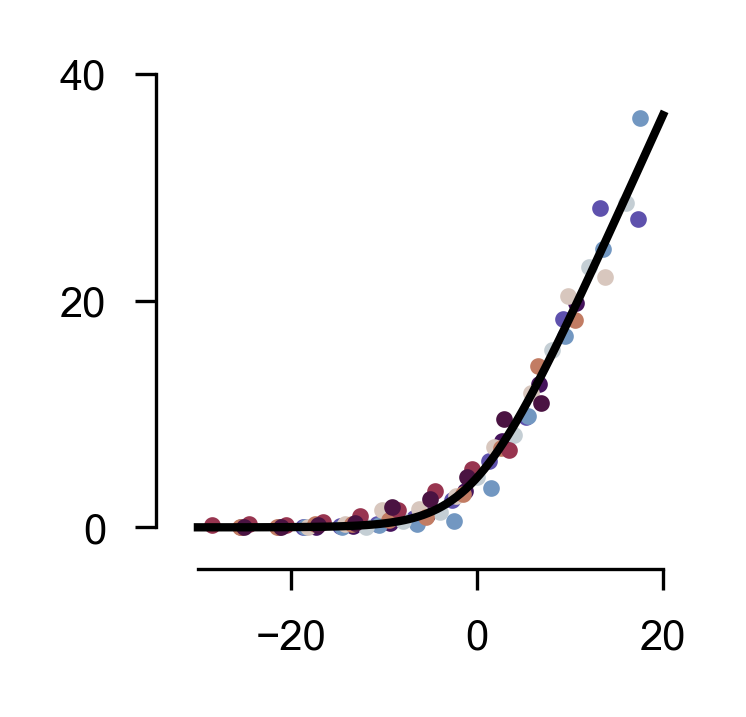

In [31]:
reload(pe)
pe.plot_vm_shifts(mean_spike_vs_vm_df,
                  save=save_figure,
                  savepath=FIGURE_PATH,
                 fnames=['ED_Fig_9d','ED_Fig_9c'])

### Control for walking dynamics (ED FIg. 8c-d)

In [32]:
reload(pe)
modulation_df_ctl_walk=pe.get_modulation_df_ctl_walking(abf_fixation_df)

21 flies


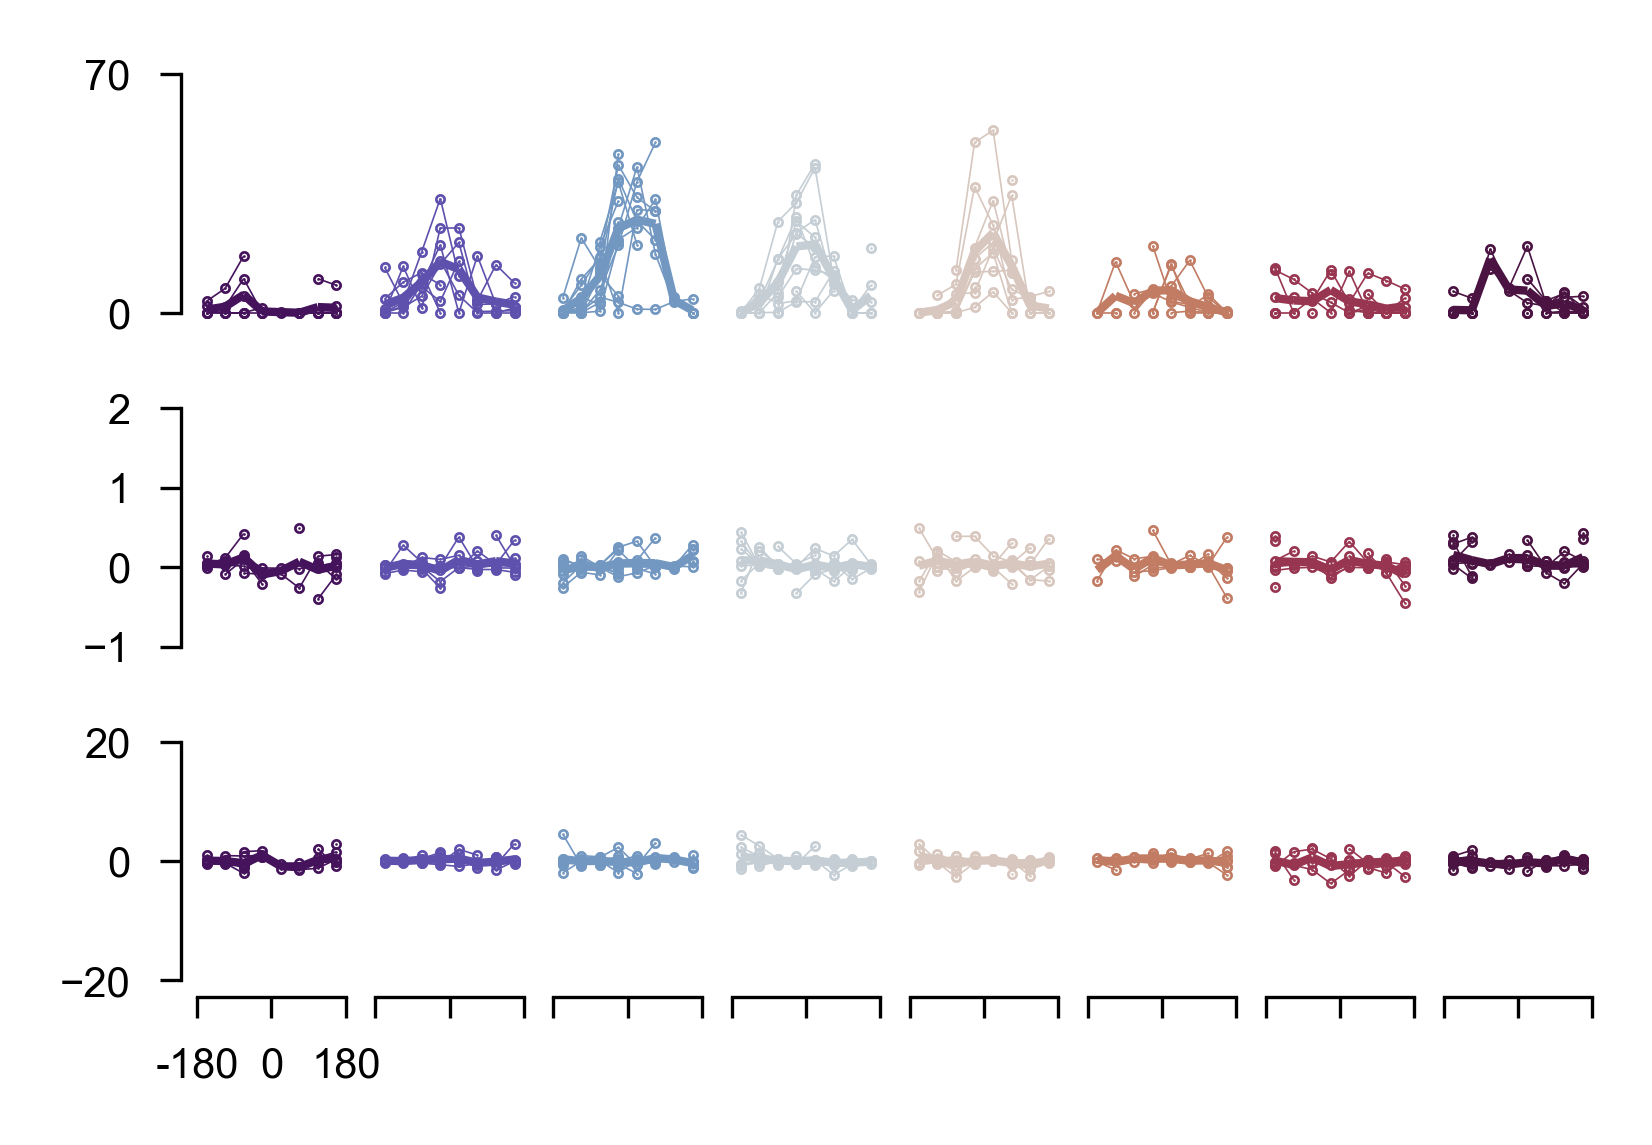

In [33]:
reload(pe)
pe.plot_ctl_for_walking(modulation_df_ctl_walk,rec_name_to_cell_no,
                    save_figure=save_figure,
                    save_figure_path=FIGURE_PATH,
                    figure_fname='ED_Fig_8c_d.pdf',
                    save_source_data=save_source_data,
                    save_source_data_path=SOURCE_DATA_PATH,
                    source_data_fname='ED_Fig_8c_d.csv')

### Locomotor related activity (ED Fig. 8a-b)

In [34]:
reload(pe)
sp_by_dforw_df=pe.get_sp_by_dforw(recs,
                                  save=save_source_data,
                                 savepath=SOURCE_DATA_PATH,
                                 fname='ED_Fig_8a.csv')

21 cells


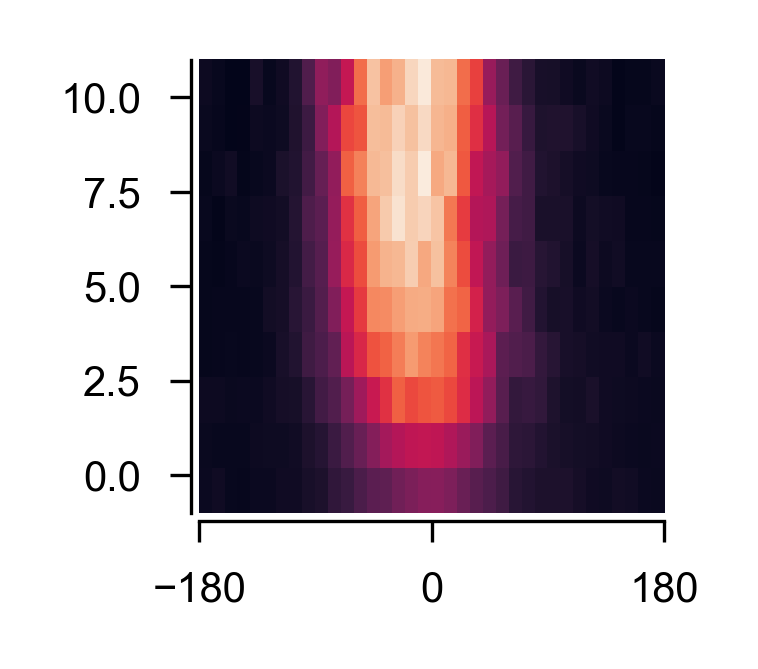

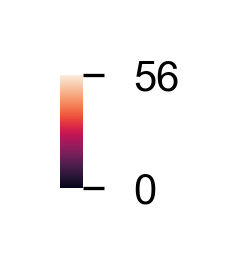

In [35]:
reload(pe)
pe.plot_sp_by_dforw(sp_by_dforw_df,
                    save=save_figure,
                    savepath=FIGURE_PATH,
                   fname='ED_Fig_8a')

In [36]:
reload(pe)
sp_by_dheading_df=pe.get_sp_by_dheading(recs, save=save_source_data,
                                 savepath=SOURCE_DATA_PATH,
                                 fname='ED_Fig_8b.csv')

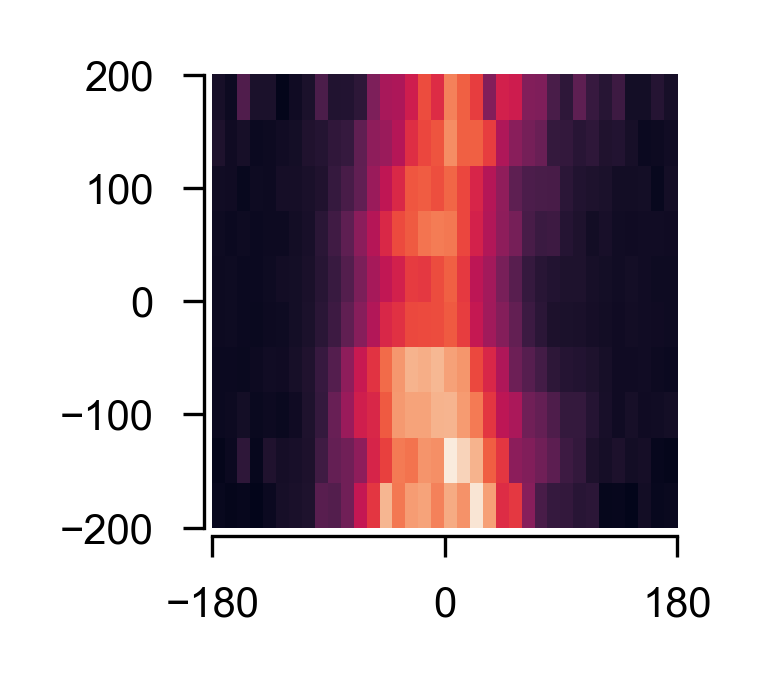

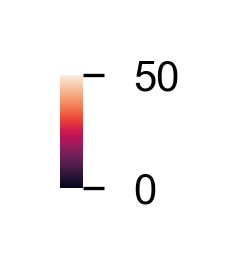

In [37]:
reload(pe)
pe.plot_sp_by_dheading(sp_by_dheading_df, save=save_figure,
                    savepath=FIGURE_PATH,
                   fname='ED_Fig_8b')

### Menotaxis bout detection algorithm (ED Fig. 2)

genotype
VT000355-AD-VT037220-DBD    21
dtype: int64
254  bouts


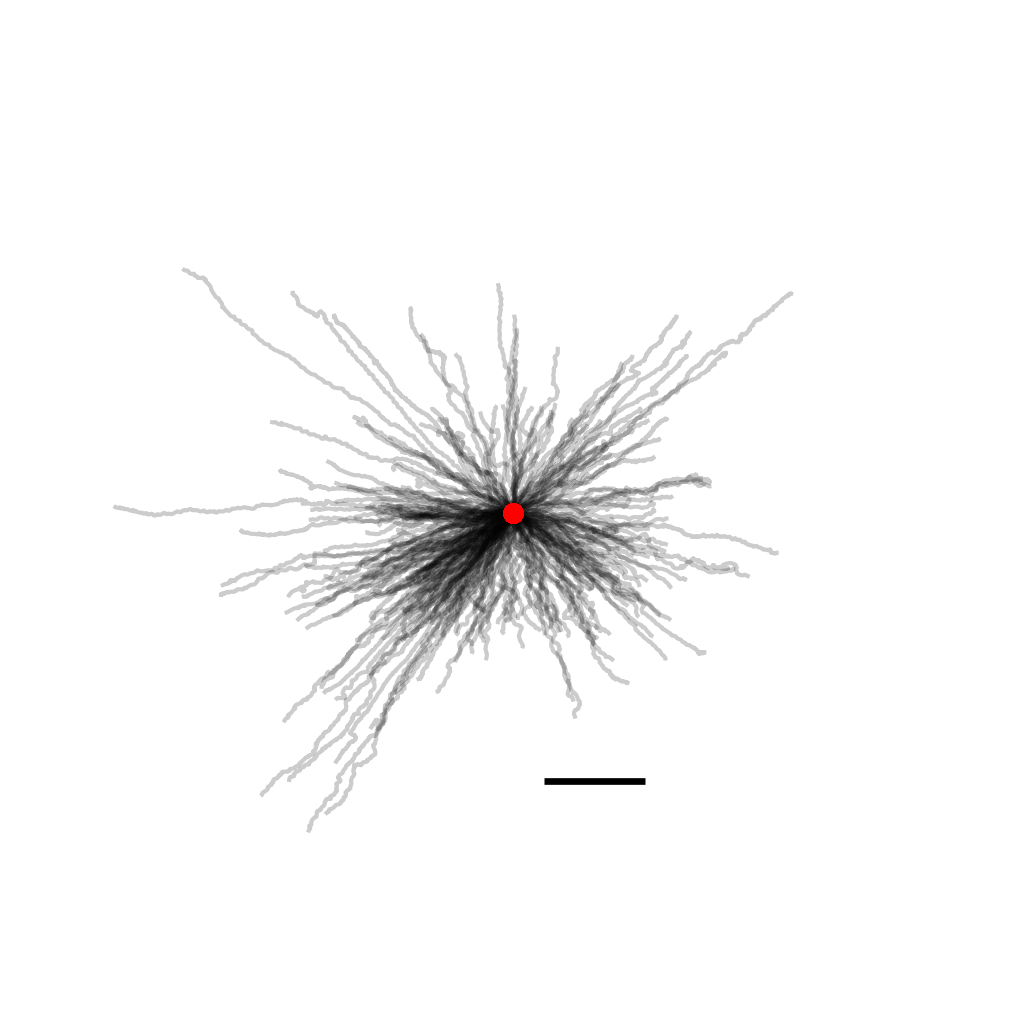

In [38]:
reload(bh)
bh.plot_fixation_bouts_ed(abf_fixation_df.query('celltype=="PFL3"'),
                          save=save_figure,
                          savepath=FIGURE_PATH,
                          fname='ED_Fig_2e_pfl3_ephys.pdf')

In [39]:
reload(pe)
menotaxis_bouts_raster_df,summary_menotaxis_df=pe.get_menotaxis_bouts_raster_and_goals(recs,
                                                                                       save=save_source_data,
                                                                                      savepath=SOURCE_DATA_PATH,
                                                                                      fname='ED_Fig_2f_pfl3_ephys.csv')

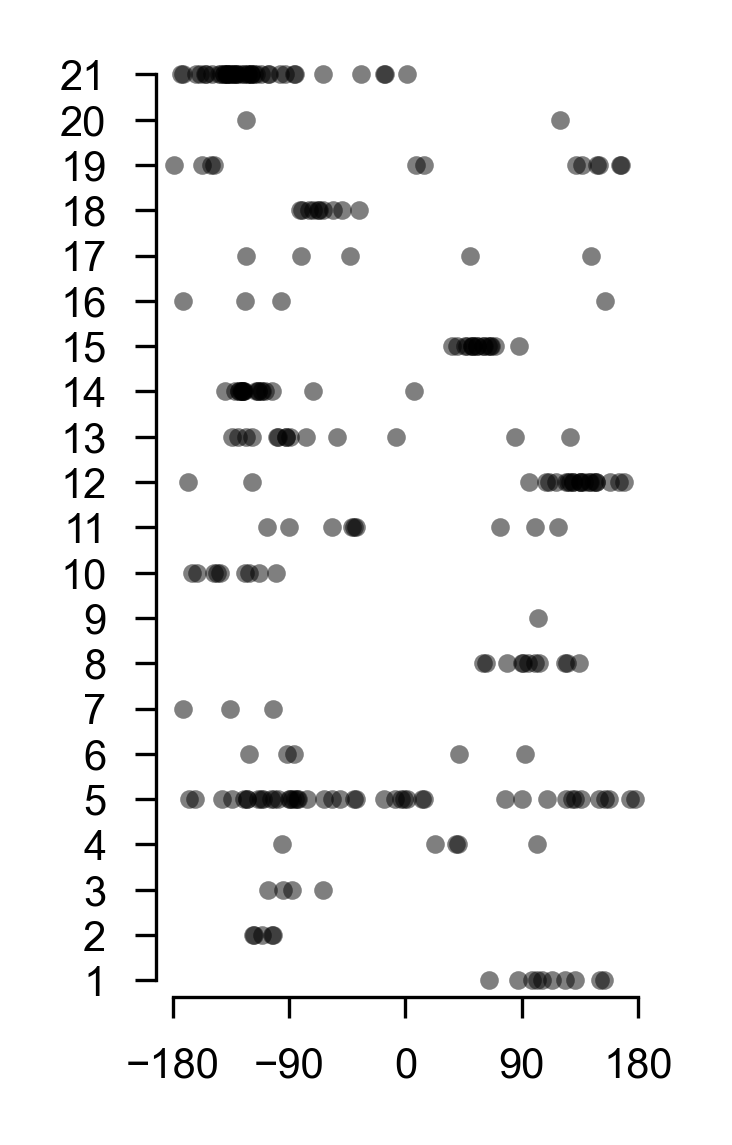

In [40]:
reload(bh)
bh.plot_menotaxis_bout_anlges(summary_menotaxis_df,
                              save=save_figure,
                              savepath=FIGURE_PATH,
                             fname='ED_Fig_2f_pfl3_ephys.pdf')

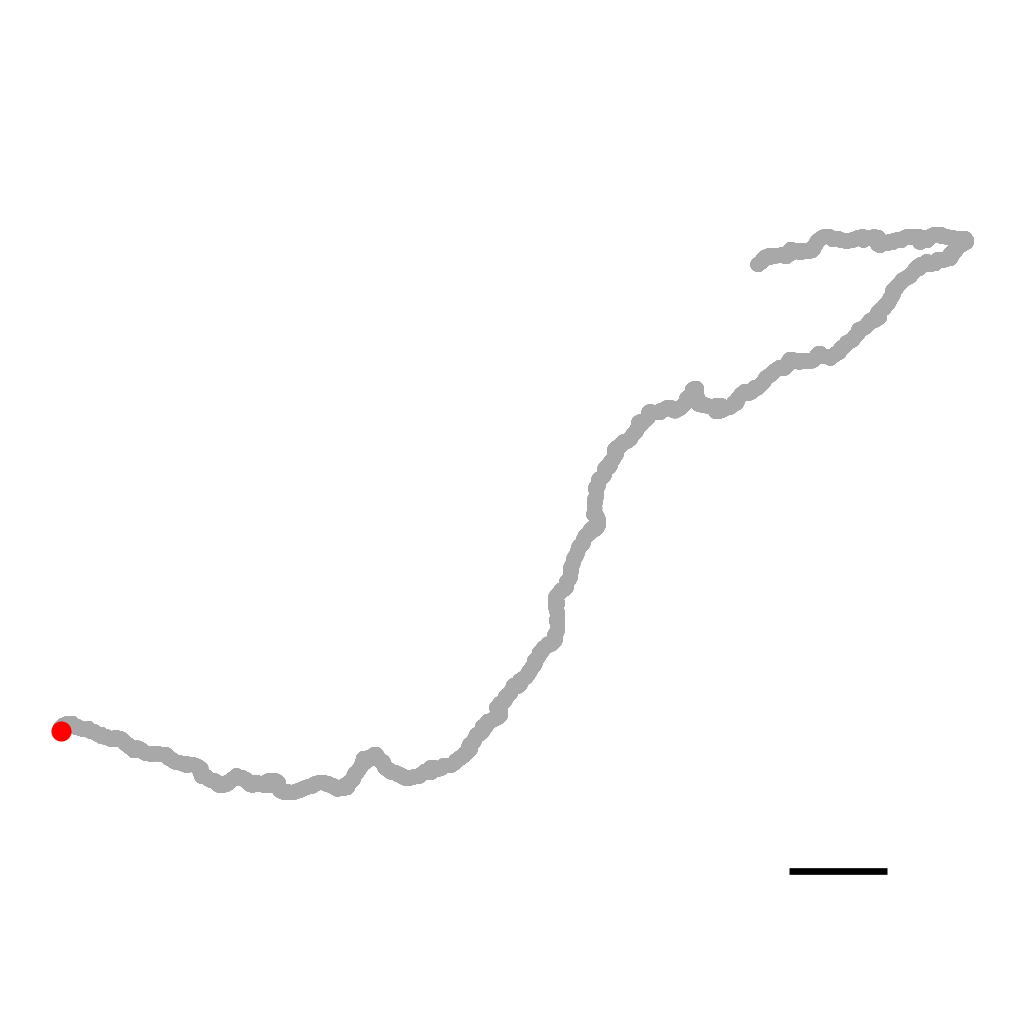

In [41]:
reload(bh)
bh.plot_example_trajectory_bare(recs,'2021_07_13_0001',
                                save=save_figure,
                                savepath=FIGURE_PATH,
                               fname='ED_Fig_2a.png')

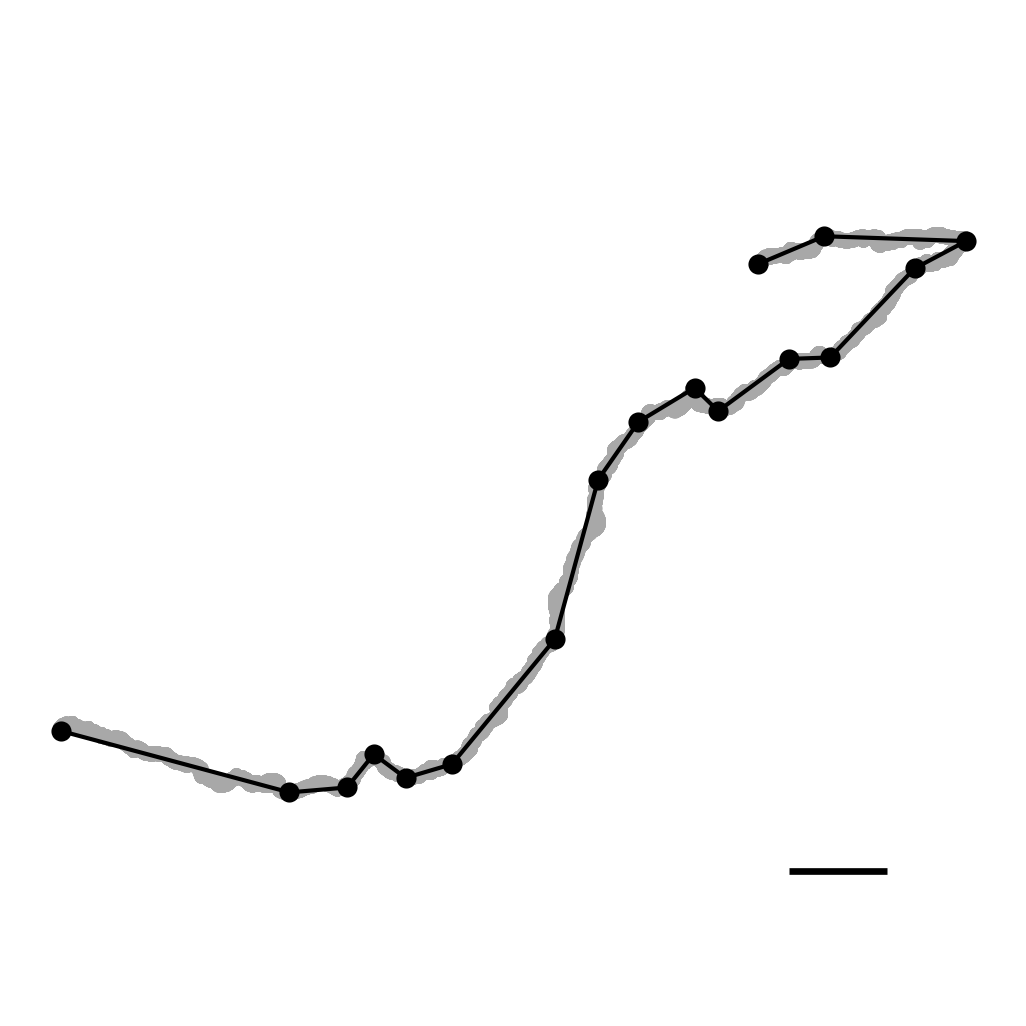

In [42]:
reload(bh)
bh.plot_example_trajectory_RDP(recs,'2021_07_13_0001',
                               save=save_figure,
                               savepath=FIGURE_PATH,
                              fname='ED_Fig_2b.png')

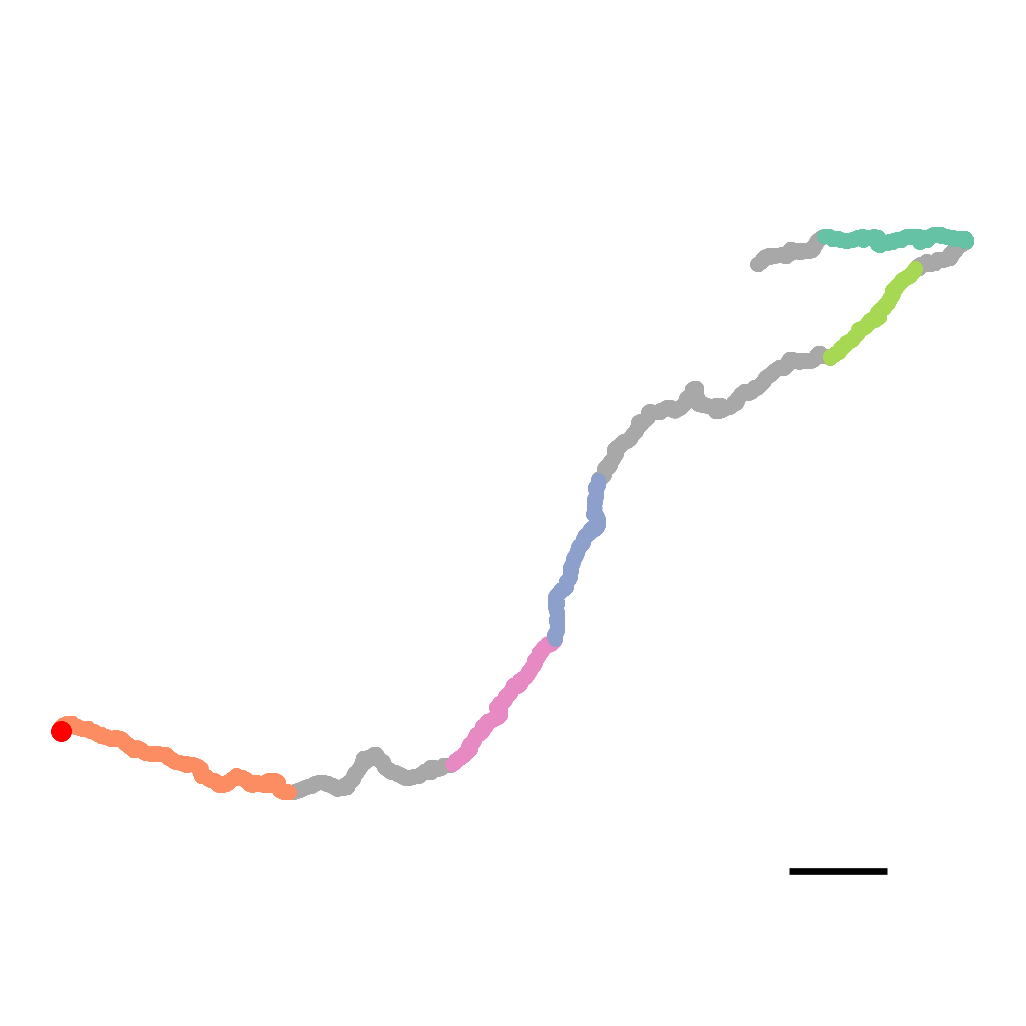

In [43]:
reload(bh)
bh.plot_example_trajectory_menotaxis(abf_fixation_df,'2021_07_13_0001',
                                     save=save_figure,
                                     savepath=FIGURE_PATH,
                                    fname='ED_Fig_2c.png')

In [44]:
print('goal:', abf_fixation_df.query(f'rec_name=="2021_07_13_0001" & fixation_event_id==52')['goal'].iloc[0])

goal: 22.54288368775886


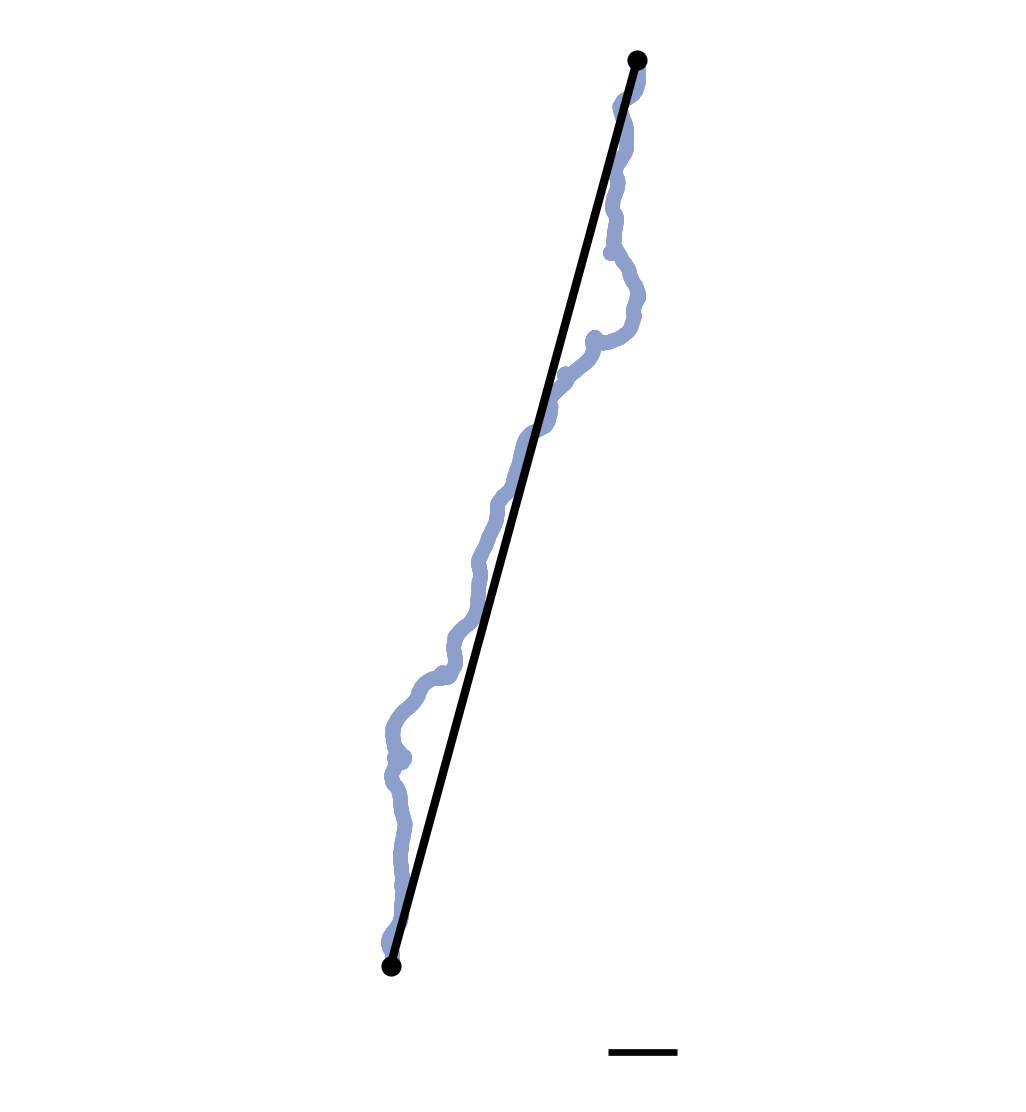

In [45]:
reload(bh)
bh.plot_single_bout(abf_fixation_df,'2021_07_13_0001',fixation_event_id=52,
                    save=save_figure,
                    savepath=FIGURE_PATH,
                   fname='ED_Fig_2d.png')

### Behaviour characterization (ED Fig. 2i)

In [46]:
abf_trials_df=bh.get_trials(recs,pad_s=60,stimid_map= 
              {'+90 jump':[9,11],
              '-90 jump':[7,9],
              'CL_bar':[-1,5]
              },bar_jump_duration_s=2,im=False)

In [47]:
reload(bh)
selected_trials_df=bh.get_selected_trials(abf_trials_df.query('celltype=="PFL3"'),criteria='std_before<45')

fraction of valid trials: 0.7270114942528736


In [48]:
reload(bh)
mean_trial_fly_df,trial_fly_df=bh.get_mean_goal_diff(selected_trials_df, 
                                                     save=save_source_data,
                                                    savepath=SOURCE_DATA_PATH,
                                                    fname='ED_Fig_2i_pfl3_ephys.csv')

Total flies:
 trial_type
-90 jump    18
+90 jump    17
dtype: int64


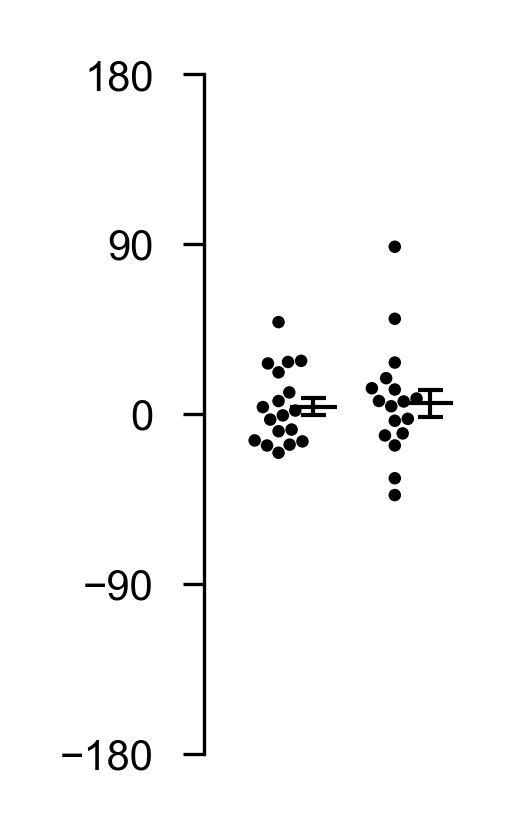

In [49]:
bh.plot_goal_diff(mean_trial_fly_df,trial_fly_df,
                 save=save_figure,
                  savepath=FIGURE_PATH,
                  fname='ED_Fig_2i_pfl3_ephys.pdf')

135 -90 trials
118 +90 trials


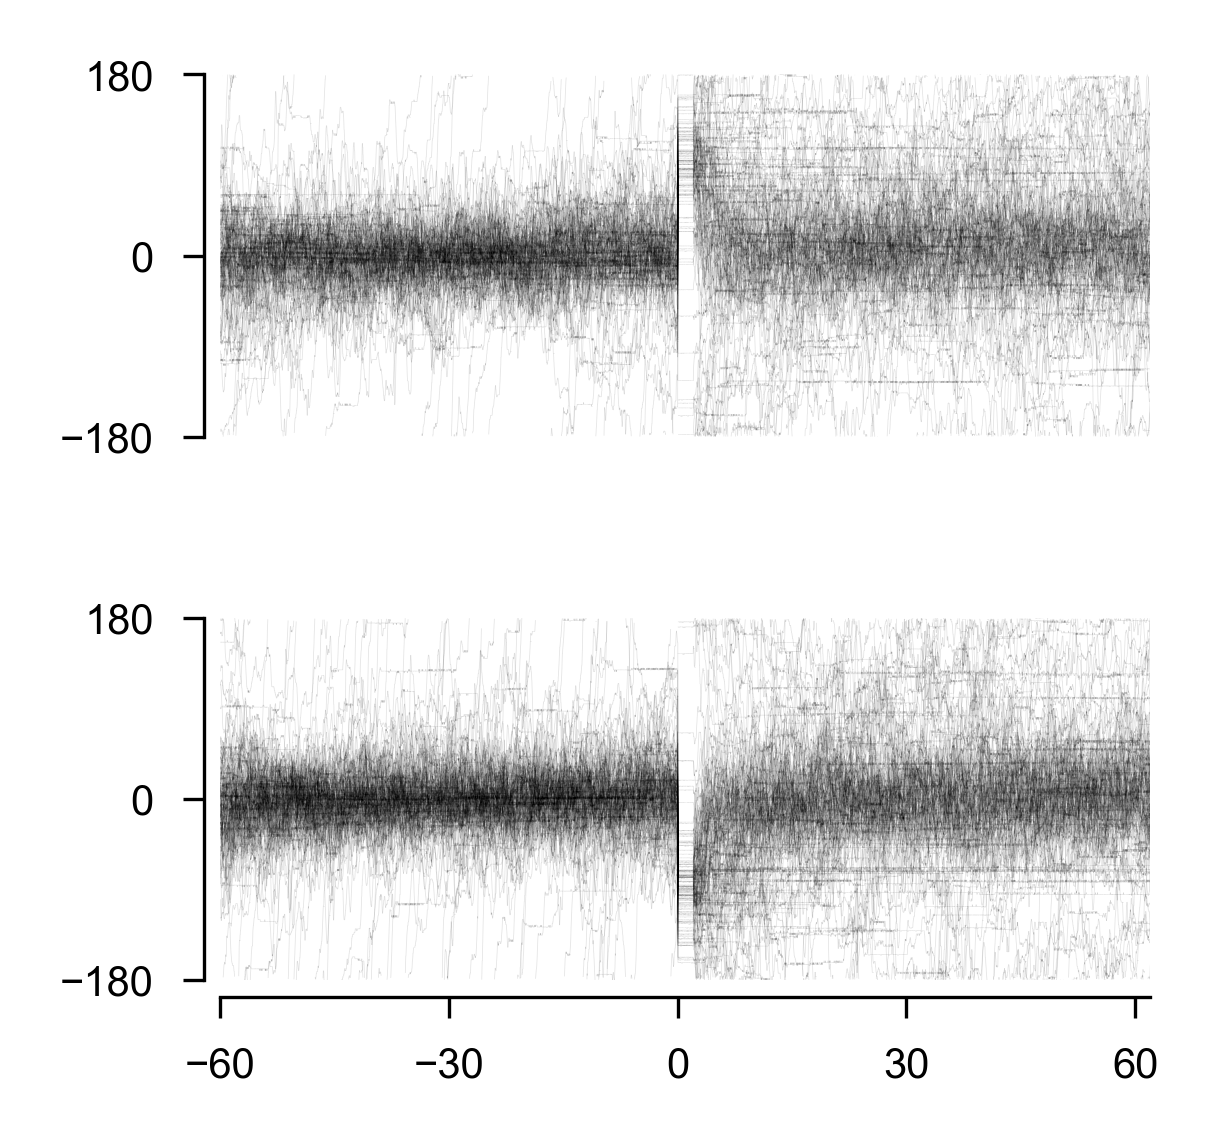

In [51]:
reload(bh)
bh.plot_bar_jump_trials(selected_trials_df,
                        save=save_figure,
                        savepath=FIGURE_PATH,
                       fname='ED_Fig_2h_pfl3_ephys.png')

20 flies


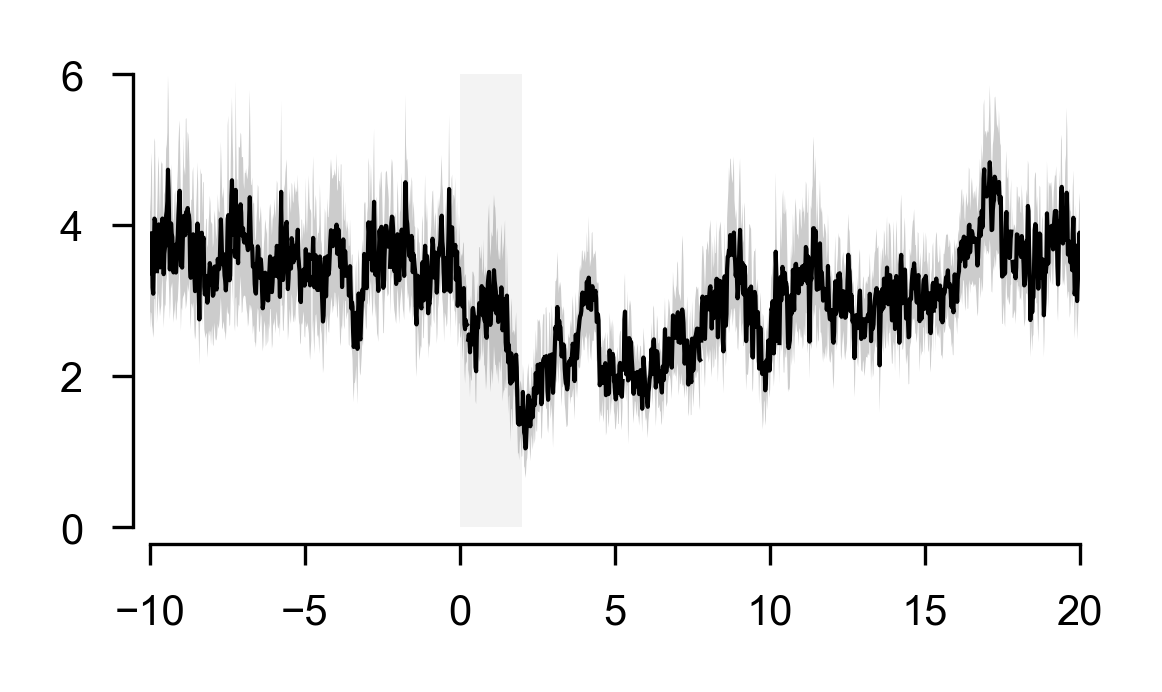

In [52]:
reload(bh)

bar_jump_fly_mean_dforw_df=bh.get_dforw_bar_jump_df(selected_trials_df)
bh.plot_dforw_bar_jump_trials(bar_jump_fly_mean_dforw_df,
                             save=save_figure,
                              savepath=FIGURE_PATH,
                              fname='ED_Fig_2j.pdf')

# Save processed data

In [ ]:
PROCESSED_DATA_PATH='/YOUR_PATH/Converting_allo_goal_to_ego_steering/shared_data/PFL3_ephys/'

In [ ]:
reload(pe)
pe.save_processed_data(PROCESSED_DATA_PATH,recs)